In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_excel="/content/drive/MyDrive/haha/Clustering+Clean+Ads_Data.xlsx"

In [5]:
df_excel=pd.read_excel(path_excel)

In [6]:
df_excel.head()


Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [7]:
df_excel.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [8]:
df_excel.info

<bound method DataFrame.info of           Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      P

In [9]:
df_excel.shape

(23066, 19)

In [10]:
df_excel.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    18330.0  7.366054e-02  7.515992e-02      0.0001   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.0000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.0000   

                                25%           50%           75%          max  
Ad - Length              120.000000     300.00000  7.200000e+02       728.00  
Ad- Width                250.000000     300.00000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.00000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.00000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.50000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.00000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.00000  1.279375e+04    143049.00  
Spend                     85.180000    1425.12500  3.121400e+03     26931.87  
Fee                        0.330000       0.35000  3.500000e-01         0.35  
Revenue                   55.365375     926.33500  2.091338e+03     21276.18  
CTR                        0.002600       0.08255  1.300000e-01         1.00  
CPM                        1.710000       7.66000  1.251000e+01        81.56  
CPC                        0.090000       0.16000  5.700000e-01         7.26

In [11]:
for i in df_excel.columns:
  print(i,df_excel[i].isnull().sum())

Timestamp 0
InventoryType 0
Ad - Length 0
Ad- Width 0
Ad Size 0
Ad Type 0
Platform 0
Device Type 0
Format 0
Available_Impressions 0
Matched_Queries 0
Impressions 0
Clicks 0
Spend 0
Fee 0
Revenue 0
CTR 4736
CPM 4736
CPC 4736


In [12]:
def calculate_CPM(col):
 Spend =df_excel.Spend
 Impressions=df_excel.Impressions
 CPM= Spend/Impressions *1000
 return(CPM)

In [13]:
df_excel['CPM']= df_excel[['CPM']].apply(lambda x: calculate_CPM(x))

In [14]:
df_excel.T

0            1            2            3      \
Timestamp              2020-9-2-17  2020-9-2-10  2020-9-1-22  2020-9-3-20   
InventoryType              Format1      Format1      Format1      Format1   
Ad - Length                    300          300          300          300   
Ad- Width                      250          250          250          250   
Ad Size                      75000        75000        75000        75000   
Ad Type                   Inter222     Inter227     Inter222     Inter228   
Platform                     Video          App        Video        Video   
Device Type                Desktop       Mobile      Desktop       Mobile   
Format                     Display        Video      Display        Video   
Available_Impressions         1806         1780         2727         2430   
Matched_Queries                325          285          356          497   
Impressions                    323          285          355          495   
Clicks                           1            1            1            1   
Spend                          0.0          0.0          0.0          0.0   
Fee                           0.35         0.35         0.35         0.35   
Revenue                        0.0          0.0          0.0          0.0   
CTR                         0.0031       0.0035       0.0028        0.002   
CPM                            0.0          0.0          0.0          0.0   
CPC                            0.0          0.0          0.0          0.0   

                             4           5           6           7      \
Timestamp              2020-9-4-15  2020-9-4-5  2020-9-4-6  2020-9-6-7   
InventoryType              Format1     Format1     Format1     Format1   
Ad - Length                    300         300         300         300   
Ad- Width                      250         250         250         250   
Ad Size                      75000       75000       75000       75000   
Ad Type                   Inter217    Inter219    Inter221    Inter228   
Platform                       Web       Video         App       Video   
Device Type                Desktop     Desktop      Mobile      Mobile   
Format                       Video     Display       Video       Video   
Available_Impressions         1218         490        1197        1363   
Matched_Queries                242          64         202         198   
Impressions                    242          64         202         196   
Clicks                           1           2           1           1   
Spend                          0.0         0.0        0.01         0.0   
Fee                           0.35        0.35        0.35        0.35   
Revenue                        0.0         0.0         0.0         0.0   
CTR                         0.0041      0.0313       0.005      0.0051   
CPM                            0.0         0.0    0.049505         0.0   
CPC                            0.0         0.0        0.01         0.0   

                            8             9      ...         23056  \
Timestamp              2020-9-8-6  2020-9-11-17  ...  2020-11-23-4   
InventoryType             Format1       Format1  ...       Format4   
Ad - Length                   300           300  ...           120   
Ad- Width                     250           250  ...           600   
Ad Size                     75000         75000  ...         72000   
Ad Type                  Inter223      Inter228  ...      Inter223   
Platform                      Web         Video  ...           Web   
Device Type                Mobile        Mobile  ...        Mobile   
Format                      Video       Display  ...         Video   
Available_Impressions        1402          1816  ...             2   
Matched_Queries               137           312  ...             2   
Impressions                   136           311  ...             2   
Clicks                          1             1  ...             1   
Spend                      

In [15]:
def calculate_CTR(col):
 Clicks=df_excel.Clicks
 Impressions=df_excel.Impressions
 CTR= Clicks/Impressions *100
 return(CTR)

In [16]:
df_excel['CTR']= df_excel[['CTR']].apply(lambda x: calculate_CTR(x))

In [17]:
df_excel

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue         CTR   CPM  CPC  
0              323       1   0.00  0.35   0.0000    0.309598   0.0  0.0  
1              285       1   0.00  0.35   0.0000    0.350877   0.0  0.0  
2              355       1   0.00  0.35   0.0000    0.281690   0.0  0.0  
3              495       1   0.00  0.35   0.0000    0.202020   0.0  0.0  
4              242       1   0.00  0.35   0.0000    0.413223   0.0  0.0  
...            ...     ...    ...   ...      ...         ...   ...  ...  
23061            1       1   0.07  0.35   0.0455  100.000000  70.0  NaN  
23062            2       1   0.04  0.35   0.0260   50.000000  20.0  NaN  
23063            1       1   0.05  0.35   0.0325  100.000000  50.0  NaN  
23064            1       1   0.07  0.35   0.0455  100.000000  70.0  NaN  
23065            2       1   0.09  0.35   0.0585   50.000000  45.0  NaN  

[23066 rows x 19 columns]

In [18]:
def calculate_CPC(col):
 Clicks=df_excel.Clicks
 Spend=df_excel.Spend
 CPC= Spend/Clicks
 return(CPC)

In [19]:
df_excel['CPC']= df_excel[['CPC']].apply(lambda x: calculate_CPC(x))

In [20]:
cf=df_excel

In [21]:
cf

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  
0              323       1   0.00  0.35   0.0000    0.309598   0.0  0.00  
1              285       1   0.00  0.35   0.0000    0.350877   0.0  0.00  
2              355       1   0.00  0.35   0.0000    0.281690   0.0  0.00  
3              495       1   0.00  0.35   0.0000    0.202020   0.0  0.00  
4              242       1   0.00  0.35   0.0000    0.413223   0.0  0.00  
...            ...     ...    ...   ...      ...         ...   ...   ...  
23061            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07  
23062            2       1   0.04  0.35   0.0260   50.000000  20.0  0.04  
23063            1       1   0.05  0.35   0.0325  100.000000  50.0  0.05  
23064            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07  
23065            2       1   0.09  0.35   0.0585   50.000000  45.0  0.09  

[23066 rows x 19 columns]

In [22]:

cluster_num = cf.drop(columns=["Timestamp", "InventoryType","Ad Type","Platform","Device Type","Format"])


In [23]:
cluster_num

Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
0              300        250    75000                   1806   
1              300        250    75000                   1780   
2              300        250    75000                   2727   
3              300        250    75000                   2430   
4              300        250    75000                   1218   
...            ...        ...      ...                    ...   
23061          720        300   216000                      1   
23062          720        300   216000                      3   
23063          720        300   216000                      2   
23064          120        600    72000                      7   
23065          720        300   216000                      2   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue         CTR  \
0                  325          323       1   0.00  0.35   0.0000    0.309598   
1                  285          285       1   0.00  0.35   0.0000    0.350877   
2                  356          355       1   0.00  0.35   0.0000    0.281690   
3                  497          495       1   0.00  0.35   0.0000    0.202020   
4                  242          242       1   0.00  0.35   0.0000    0.413223   
...                ...          ...     ...    ...   ...      ...         ...   
23061                1            1       1   0.07  0.35   0.0455  100.000000   
23062                2            2       1   0.04  0.35   0.0260   50.000000   
23063                1            1       1   0.05  0.35   0.0325  100.000000   
23064                1            1       1   0.07  0.35   0.0455  100.000000   
23065                2            2       1   0.09  0.35   0.0585   50.000000   

        CPM   CPC  
0       0.0  0.00  
1       0.0  0.00  
2       0.0  0.00  
3       0.0  0.00  
4       0.0  0.00  
...     ...   ...  
23061  70.0  0.07  
23062  20.0  0.04  
23063  50.0  0.05  
23064  70.0  0.07  
23065  45.0  0.09  

[23066 rows x 13 columns]

In [24]:
cluster_num.shape

(23066, 13)

In [25]:
#Check for presence of duplicate rows
df_excel.duplicated().sum()

0

In [26]:
for i in cf.columns:
  print(i,cf[i].isnull().sum())

Timestamp 0
InventoryType 0
Ad - Length 0
Ad- Width 0
Ad Size 0
Ad Type 0
Platform 0
Device Type 0
Format 0
Available_Impressions 0
Matched_Queries 0
Impressions 0
Clicks 0
Spend 0
Fee 0
Revenue 0
CTR 0
CPM 0
CPC 0


In [27]:
for i in cluster_num.columns:
  print(i,cluster_num[i].isnull().sum())

Ad - Length 0
Ad- Width 0
Ad Size 0
Available_Impressions 0
Matched_Queries 0
Impressions 0
Clicks 0
Spend 0
Fee 0
Revenue 0
CTR 0
CPM 0
CPC 0


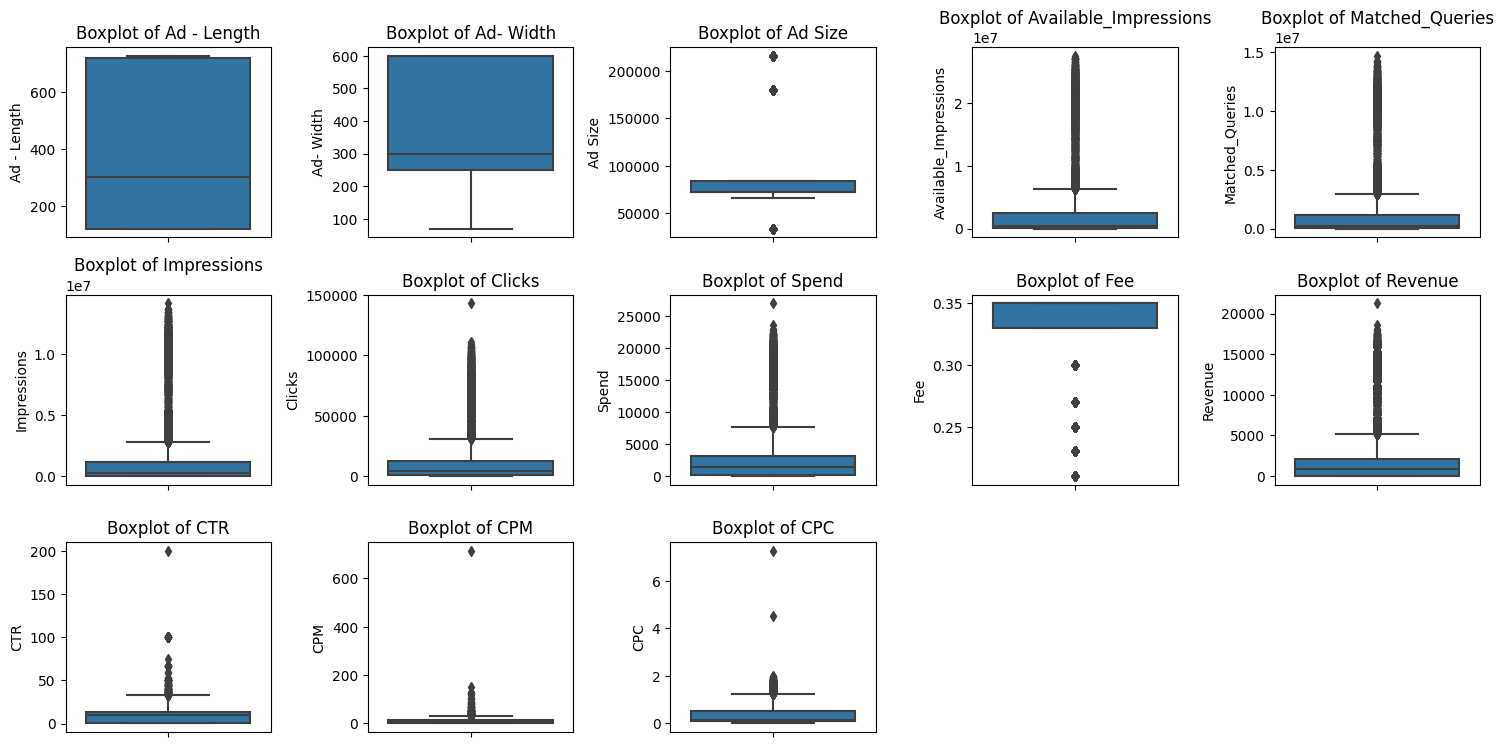

In [28]:
plt.figure(figsize = (15,10))
feature_list = cluster_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y = cluster_num [feature_list[i]], data = cluster_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [29]:
def remove_outliers(col):
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  LL=q1-(1.5*IQR)
  UL=q3+(1.5*IQR)
  return LL, UL



In [30]:
for i in cluster_num.columns:
  LL,UL = remove_outliers(cluster_num[i])
  cluster_num[i]=np.where(cluster_num[i]>UL, UL , cluster_num[i])
  cluster_num[i]=np.where(cluster_num[i]<LL, LL , cluster_num[i])

In [31]:
cluster_num

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0            300.0      250.0   75000.0                 1806.0   
1            300.0      250.0   75000.0                 1780.0   
2            300.0      250.0   75000.0                 2727.0   
3            300.0      250.0   75000.0                 2430.0   
4            300.0      250.0   75000.0                 1218.0   
...            ...        ...       ...                    ...   
23061        720.0      300.0  102000.0                    1.0   
23062        720.0      300.0  102000.0                    3.0   
23063        720.0      300.0  102000.0                    2.0   
23064        120.0      600.0   72000.0                    7.0   
23065        720.0      300.0  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue        CTR  \
0                325.0        323.0     1.0   0.00  0.35   0.0000   0.309598   
1                285.0        285.0     1.0   0.00  0.35   0.0000   0.350877   
2                356.0        355.0     1.0   0.00  0.35   0.0000   0.281690   
3                497.0        495.0     1.0   0.00  0.35   0.0000   0.202020   
4                242.0        242.0     1.0   0.00  0.35   0.0000   0.413223   
...                ...          ...     ...    ...   ...      ...        ...   
23061              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  33.278766   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  33.278766   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  33.278766   

             CPM   CPC  
0       0.000000  0.00  
1       0.000000  0.00  
2       0.000000  0.00  
3       0.000000  0.00  
4       0.000000  0.00  
...          ...   ...  
23061  29.981418  0.07  
23062  20.000000  0.04  
23063  29.981418  0.05  
23064  29.981418  0.07  
23065  29.981418  0.09  

[23066 rows x 13 columns]

In [32]:
cluster_num.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  7.657684e+04  1.538132e+04  54000.000000   
Available_Impressions  23066.0  1.607253e+06  2.125528e+06      1.000000   
Matched_Queries        23066.0  7.995380e+05  1.026037e+06      1.000000   
Impressions            23066.0  7.536120e+05  9.802568e+05      1.000000   
Clicks                 23066.0  8.306828e+03  9.574779e+03      1.000000   
Spend                  23066.0  2.166060e+03  2.425190e+03      0.000000   
Fee                    23066.0  3.402883e-01  1.812855e-02      0.300000   
Revenue                23066.0  1.449389e+03  1.646894e+03      0.000000   
CTR                    23066.0  8.223203e+00  8.253522e+00      0.010874   
CPM                    23066.0  8.219181e+00  6.881016e+00      0.000000   
CPC                    23066.0  3.300346e-01  3.165682e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  1.020000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  6.268771e+06  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  2.924326e+06  
Impressions             7990.500000  225290.000000  1.112428e+06  2.769086e+06  
Clicks                   710.000000    4425.000000  1.279375e+04  3.091938e+04  
Spend                     85.180000    1425.125000  3.121400e+03  7.675730e+03  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  5.145297e+03  
CTR                        0.265107       9.391248  1.347057e+01  3.327877e+01  
CPM                        1.749084       8.371566  1.304202e+01  2.998142e+01  
CPC                        0.089736       0.139347  5.462421e-01  1.231002e+00

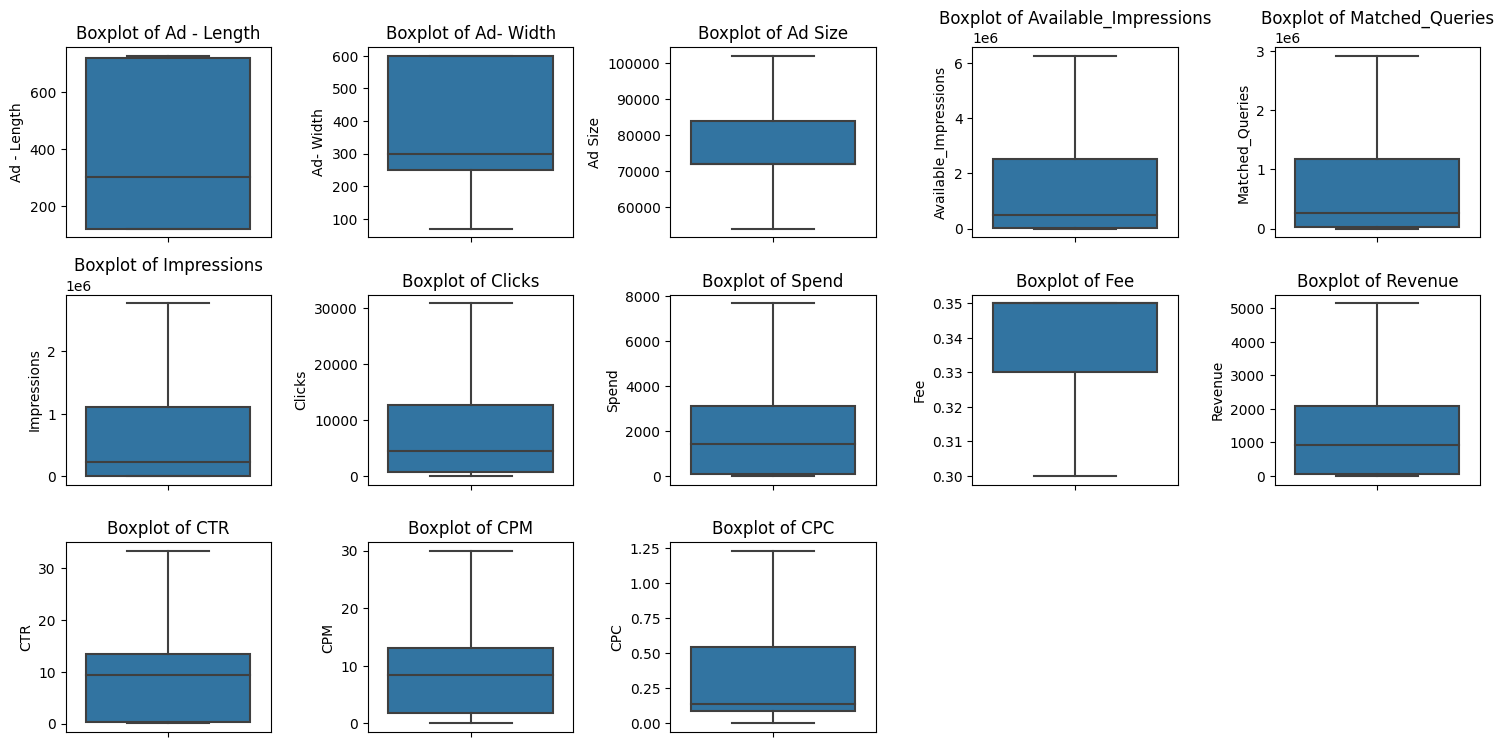

In [33]:
plt.figure(figsize = (15,10))
feature_list = cluster_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y = cluster_num [feature_list[i]], data = cluster_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [34]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [35]:
cat=[]
num=[]
for i in cluster_num.columns:
    if cluster_num[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

[]
['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']


In [36]:
from scipy.stats import zscore

In [37]:
data_scale=cluster_num[num].apply(zscore)

In [38]:
data_scale.describe().T

count          mean       std       min       25%  \
Ad - Length            23066.0  1.281478e-16  1.000022 -1.134891 -1.134891   
Ad- Width              23066.0 -1.182903e-16  1.000022 -1.319110 -0.432797   
Ad Size                23066.0  3.055833e-16  1.000022 -1.467840 -0.297564   
Available_Impressions  23066.0  9.857525e-18  1.000022 -0.756182 -0.740341   
Matched_Queries        23066.0  1.971505e-17  1.000022 -0.779265 -0.761447   
Impressions            23066.0  0.000000e+00  1.000022 -0.768806 -0.760655   
Clicks                 23066.0 -1.182903e-16  1.000022 -0.867488 -0.793438   
Spend                  23066.0 -9.857525e-17  1.000022 -0.893170 -0.858046   
Fee                    23066.0  1.143473e-15  1.000022 -2.222416 -0.567532   
Revenue                23066.0  3.943010e-17  1.000022 -0.880093 -0.846474   
CTR                    23066.0  1.380054e-16  1.000022 -0.995031 -0.964227   
CPM                    23066.0  2.464381e-17  1.000022 -1.194498 -0.940303   
CPC                    23066.0  3.943010e-17  1.000022 -1.042561 -0.759091   

                            50%       75%       max  
Ad - Length           -0.364496  1.433093  1.467332  
Ad- Width             -0.186599  1.290590  1.290590  
Ad Size               -0.297564  0.482620  1.652896  
Available_Impressions -0.528577  0.433059  2.193158  
Matched_Queries       -0.527722  0.371498  2.070914  
Impressions           -0.538975  0.366051  2.056111  
Clicks                -0.405431  0.468629  2.361729  
Spend                 -0.305523  0.393932  2.271900  
Fee                    0.535724  0.535724  0.535724  
Revenue               -0.317607  0.389803  2.244218  
CTR                    0.141524  0.635787  3.035808  
CPM                    0.022146  0.700905  3.162718  
CPC                   -0.602371  0.682987  2.846105

In [39]:
df_excel.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.000000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.000000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.000000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.000000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.000000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.000000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.210000   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.000000   
CTR                    23066.0  8.409941e+00  9.262048e+00      0.010874   
CPM                    23066.0  8.396849e+00  9.057760e+00      0.000000   
CPC                    23066.0  3.366776e-01  3.412527e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  2.160000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  2.759286e+07  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  1.470202e+07  
Impressions             7990.500000  225290.000000  1.112428e+06  1.419477e+07  
Clicks                   710.000000    4425.000000  1.279375e+04  1.430490e+05  
Spend                     85.180000    1425.125000  3.121400e+03  2.693187e+04  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  2.127618e+04  
CTR                        0.265107       9.391248  1.347057e+01  2.000000e+02  
CPM                        1.749084       8.371566  1.304202e+01  7.150000e+02  
CPC                        0.089736       0.139347  5.462421e-01  7.264000e+00

In [40]:
k_means = KMeans(n_clusters = 2)

In [41]:
k_means.fit(data_scale)

KMeans(n_clusters=2)

In [42]:
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [43]:
k_means.inertia_

183349.10202886112

In [44]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scale)
k_means.inertia_

130878.34240367389

In [45]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_scale)
k_means.inertia_

95133.92434119384

In [46]:
k_means = KMeans(n_clusters = 5)
k_means.fit(data_scale)
k_means.inertia_

61539.18919785395

In [47]:
k_means = KMeans(n_clusters = 6)
k_means.fit(data_scale)
k_means.inertia_

51676.89681600456

In [48]:
wss =[]

In [49]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scale)
    wss.append(KM.inertia_)

In [50]:
wss

[299857.99999999866,
 183349.10202886112,
 130878.35494264954,
 95133.92787211924,
 61539.18919785395,
 51676.89230709949,
 44598.25849746805,
 39597.845940435145,
 36080.707876974215,
 32981.02088384154]

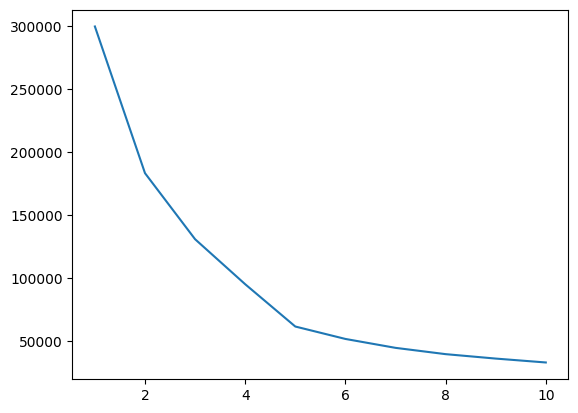

In [51]:
plt.plot(range(1,11), wss);

In [52]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scale)
labels = k_means.labels_

In [53]:
cluster_num["Clus_kmeans"] = labels
cluster_num.head(5)

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0        300.0      250.0  75000.0                 1806.0            325.0   
1        300.0      250.0  75000.0                 1780.0            285.0   
2        300.0      250.0  75000.0                 2727.0            356.0   
3        300.0      250.0  75000.0                 2430.0            497.0   
4        300.0      250.0  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  Clus_kmeans  
0        323.0     1.0    0.0  0.35      0.0  0.309598  0.0  0.0            0  
1        285.0     1.0    0.0  0.35      0.0  0.350877  0.0  0.0            0  
2        355.0     1.0    0.0  0.35      0.0  0.281690  0.0  0.0            0  
3        495.0     1.0    0.0  0.35      0.0  0.202020  0.0  0.0            0  
4        242.0     1.0    0.0  0.35      0.0  0.413223  0.0  0.0            0

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(data_scale,labels)

In [ ]:
sil_width = silhouette_samples(data_scale,labels)

In [61]:
cluster_num["sil_width"] = sil_width
cluster_num.head(5)

NameError: ignored

In [ ]:
silhouette_samples(data_scale,labels).max()

In [ ]:
cluster_num.to_csv('km.csv')

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
wcss = []
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(cluster_num)
	# inertia method returns wcss for that model
  wcss.append(kmeans.inertia_)



In [ ]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scale)
    labels = kmeans.predict(data_scale)
    sc[k] = silhouette_score(data_scale, labels)

In [ ]:
sc


{2: 0.38572769619101077,
 3: 0.3825486036570082,
 4: 0.45324270552598256,
 5: 0.5240956940501831,
 6: 0.5221533662938636,
 7: 0.5165635029478517,
 8: 0.47972249893837277,
 9: 0.4320636564025043}

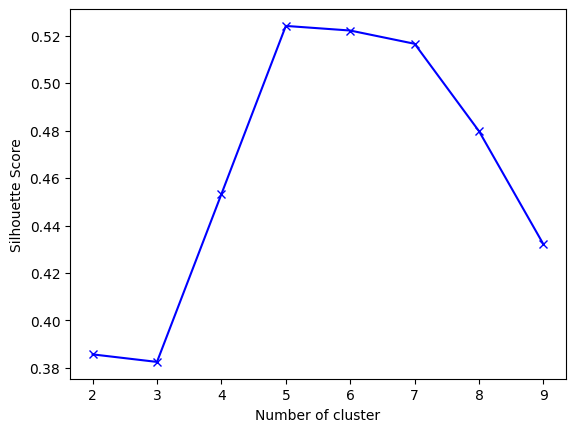

In [ ]:
#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

We can see from the plot that silhouette score is highest for k=5. Well that makes it slightly easy for us and we can start with first understanding these 5 clusters. So let's take the number of clusters as 5.

In [ ]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scale.copy(deep=True)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(data_scale)

#Adding predicted labels to the original data and scaled data
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scale)
cf['KMeans_Labels'] = kmeans.predict(data_scale)

In [ ]:
cf['KMeans_Labels'].value_counts()

4    6524
0    6275
1    4676
2    4054
3    1537
Name: KMeans_Labels, dtype: int64

In [ ]:
cf.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  \
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0   
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0   
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0   
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0   
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0   

   KMeans_Labels  
0              0  
1              0  
2              0  
3              0  
4              0

In [ ]:
# Filtering and checking the Device type in the clusters
cf[cf['KMeans_Labels']==7]

Empty DataFrame
Columns: [Timestamp, InventoryType, Ad - Length, Ad- Width, Ad Size, Ad Type, Platform, Device Type, Format, Available_Impressions, Matched_Queries, Impressions, Clicks, Spend, Fee, Revenue, CTR, CPM, CPC, KMeans_Labels]
Index: []

In [ ]:
#Calculating mean and median of the original data for each label
mean = cf.groupby('KMeans_Labels').mean()
median = cf.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean' , 'group_4 Mean' , 'group_0 Median', 'group_1 Median', 'group_2 Median' , 'group_3 Median' , 'group_4 Median']
df_kmeans.T

group_0 Mean   group_1 Mean  group_2 Mean  \
Ad - Length            4.216963e+02     683.825492  4.657819e+02   
Ad- Width              1.520016e+02     303.785287  1.991490e+02   
Ad Size                5.500884e+04  206160.821215  7.517657e+04   
Available_Impressions  1.810314e+06  251346.513687  1.038821e+07   
Matched_Queries        8.642623e+05  137550.912104  5.625808e+06   
Impressions            8.262209e+05  116771.362703  5.447310e+06   
Clicks                 3.263132e+03   14406.540205  1.124575e+04   
Spend                  1.500091e+03    1252.285569  8.646648e+03   
Fee                    3.492637e-01       0.349538  2.904391e-01   
Revenue                9.774242e+02     815.541831  6.373660e+03   
CTR                    4.043922e-01      13.857220  2.172420e-01   
CPM                    1.788731e+00      12.098200  1.573280e+00   
CPC                    5.446141e-01       0.090012  7.609292e-01   

                        group_3 Mean  group_4 Mean  group_0 Median  \
Ad - Length               141.454782    143.280809    4.800000e+02   
Ad- Width                 572.446324    572.103004    7.000000e+01   
Ad Size                 75614.834092  76597.026364    3.360000e+04   
Available_Impressions  806328.422902  32093.558860    1.833902e+06   
Matched_Queries        566864.050748  19624.057633    8.610010e+05   
Impressions            478148.522446  13492.040313    8.156060e+05   
Clicks                  65315.176318   1914.448804    3.254000e+03   
Spend                    6990.360898    209.162609    1.548630e+03   
Fee                         0.288302      0.349988    3.500000e-01   
Revenue                  5017.538285    135.993379    1.006610e+03   
CTR                        13.752664     16.037897    3.979831e-01   
CPM                        15.385753     14.693481    1.817682e+00   
CPC                         0.111918      0.102794    4.687385e-01   

                       group_1 Median  group_2 Median  group_3 Median  \
Ad - Length                720.000000    3.000000e+02      120.000000   
Ad- Width                  300.000000    2.500000e+02      600.000000   
Ad Size                 216000.000000    7.500000e+04    72000.000000   
Available_Impressions   213610.000000    7.052044e+06   831024.000000   
Matched_Queries         137284.000000    3.876646e+06   583232.000000   
Impressions             115859.000000    3.794097e+06   490310.000000   
Clicks                   14723.500000    8.928500e+03    68257.000000   
Spend                     1336.860000    5.229225e+03     7172.600000   
Fee                          0.350000    3.000000e-01        0.270000   
Revenue                    868.955000    3.660460e+03     5236.000000   
CTR                         12.469471    2.242493e-01       13.575089   
CPM                         11.087378    1.564732e+00       14.826422   
CPC                          0.090971    7.148931e-01        0.111486   

                       group_4 Median  
Ad - Length                120.000000  
Ad- Width                  600.000000  
Ad Size                  72000.000000  
Available_Impressions    13920.500000  
Matched_Queries           8263.500000  
Impressions               3631.500000  
Clicks                     454.000000  
Spend                       47.460000  
Fee                          0.350000  
Revenue                     30.848000  
CTR                         13.823976  
CPM                         13.381682  
CPC                          0.092500

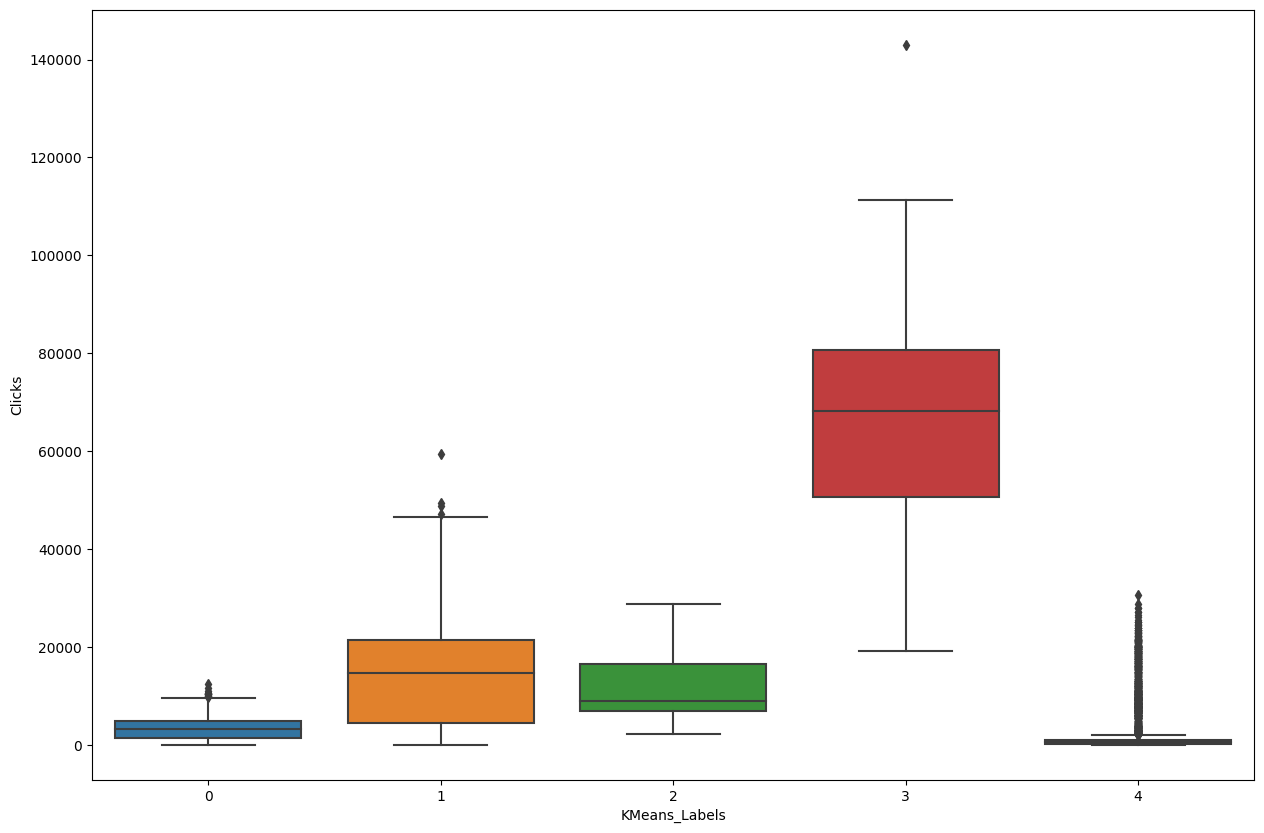

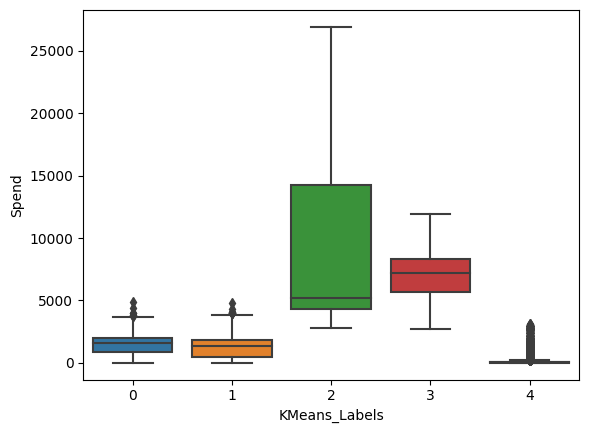

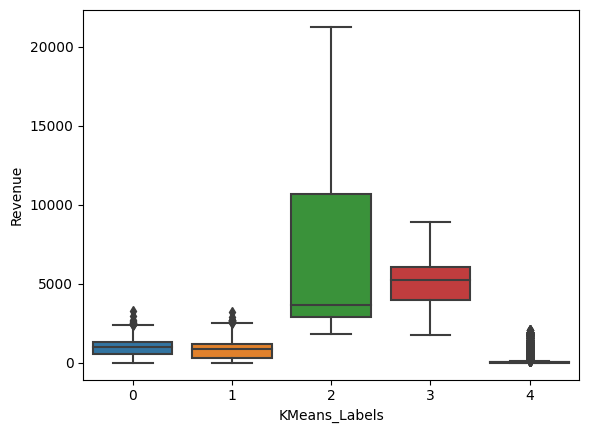

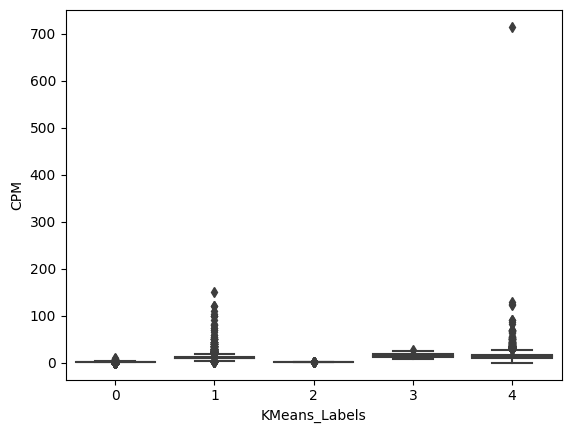

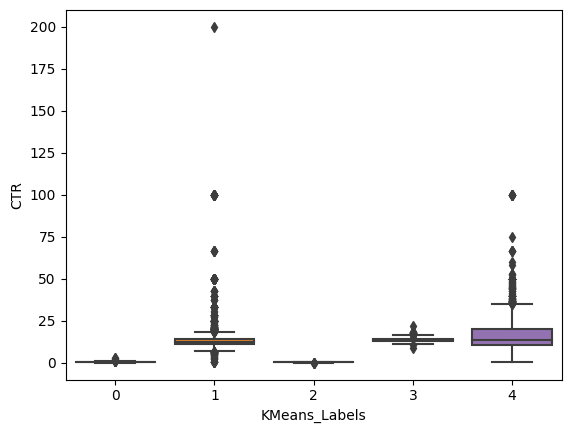

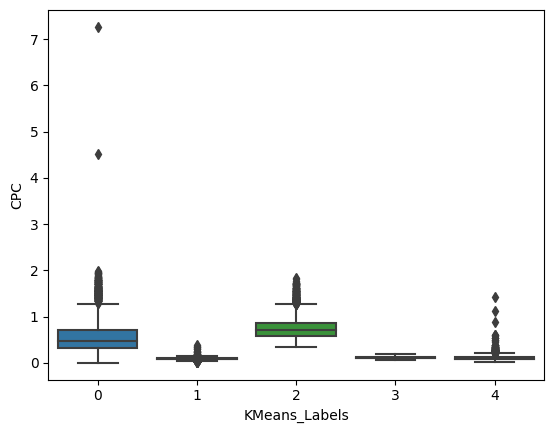

In [ ]:
cols_visualise = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']
plt.figure(figsize = (15,10))
for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = cf)
    plt.show()

In [58]:
import scipy.cluster.hierarchy as shc

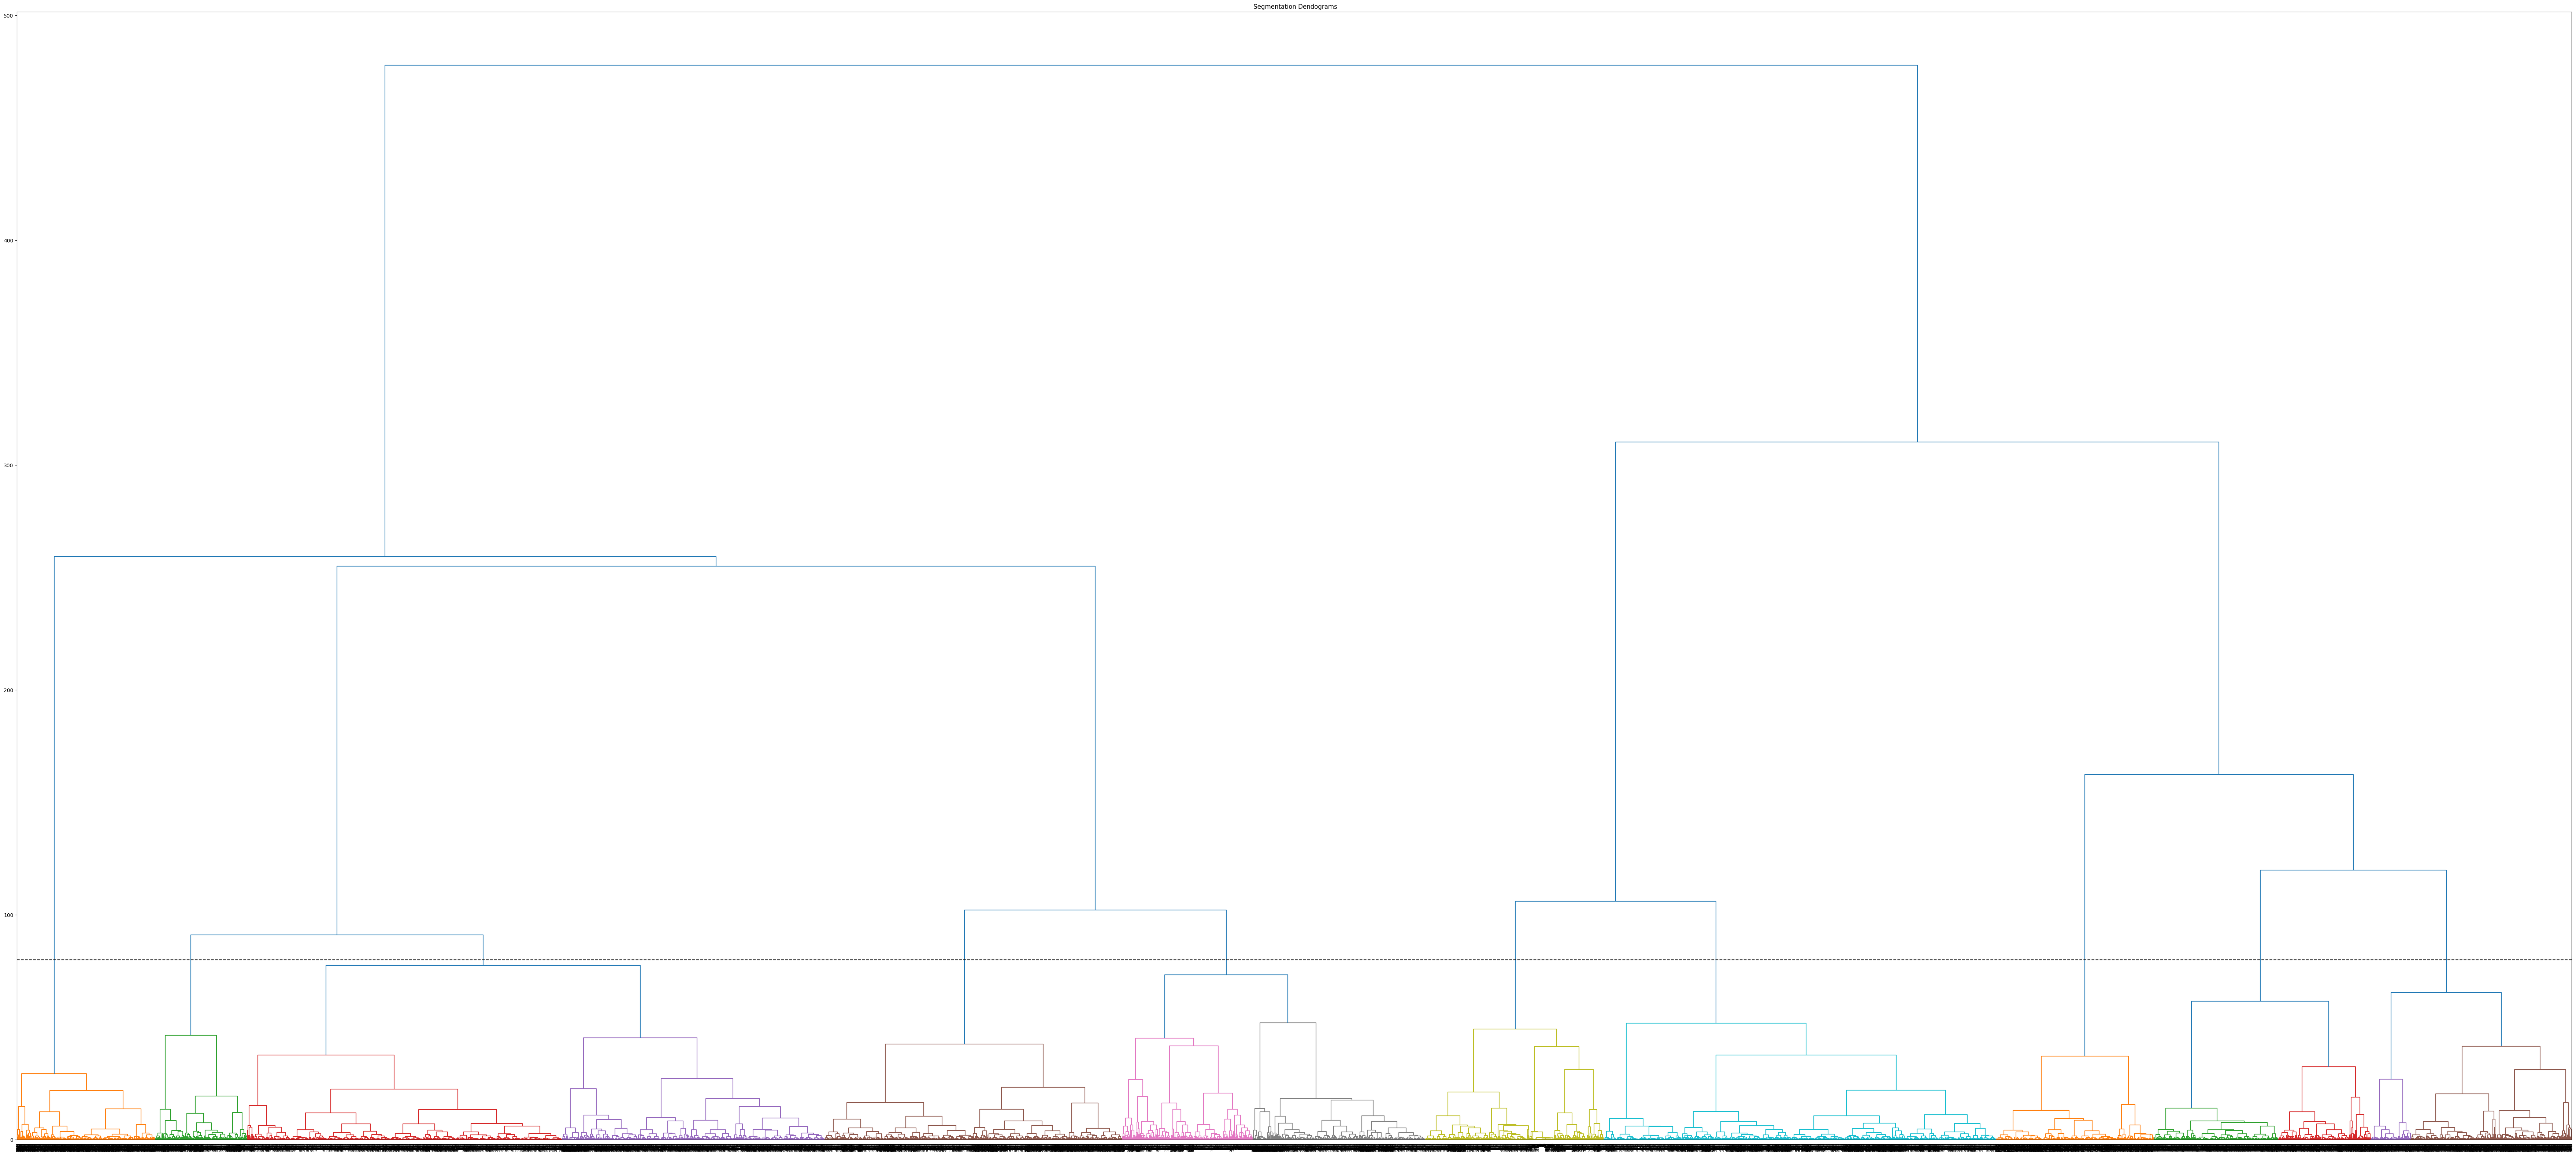

In [60]:
plt.figure(figsize=(90, 40))
plt.title(" Segmentation Dendograms")
dend = shc.dendrogram(shc.linkage(data_scale, method='ward'),color_threshold=60)
plt.axhline(80, color='black', linestyle='--')
plt.show()

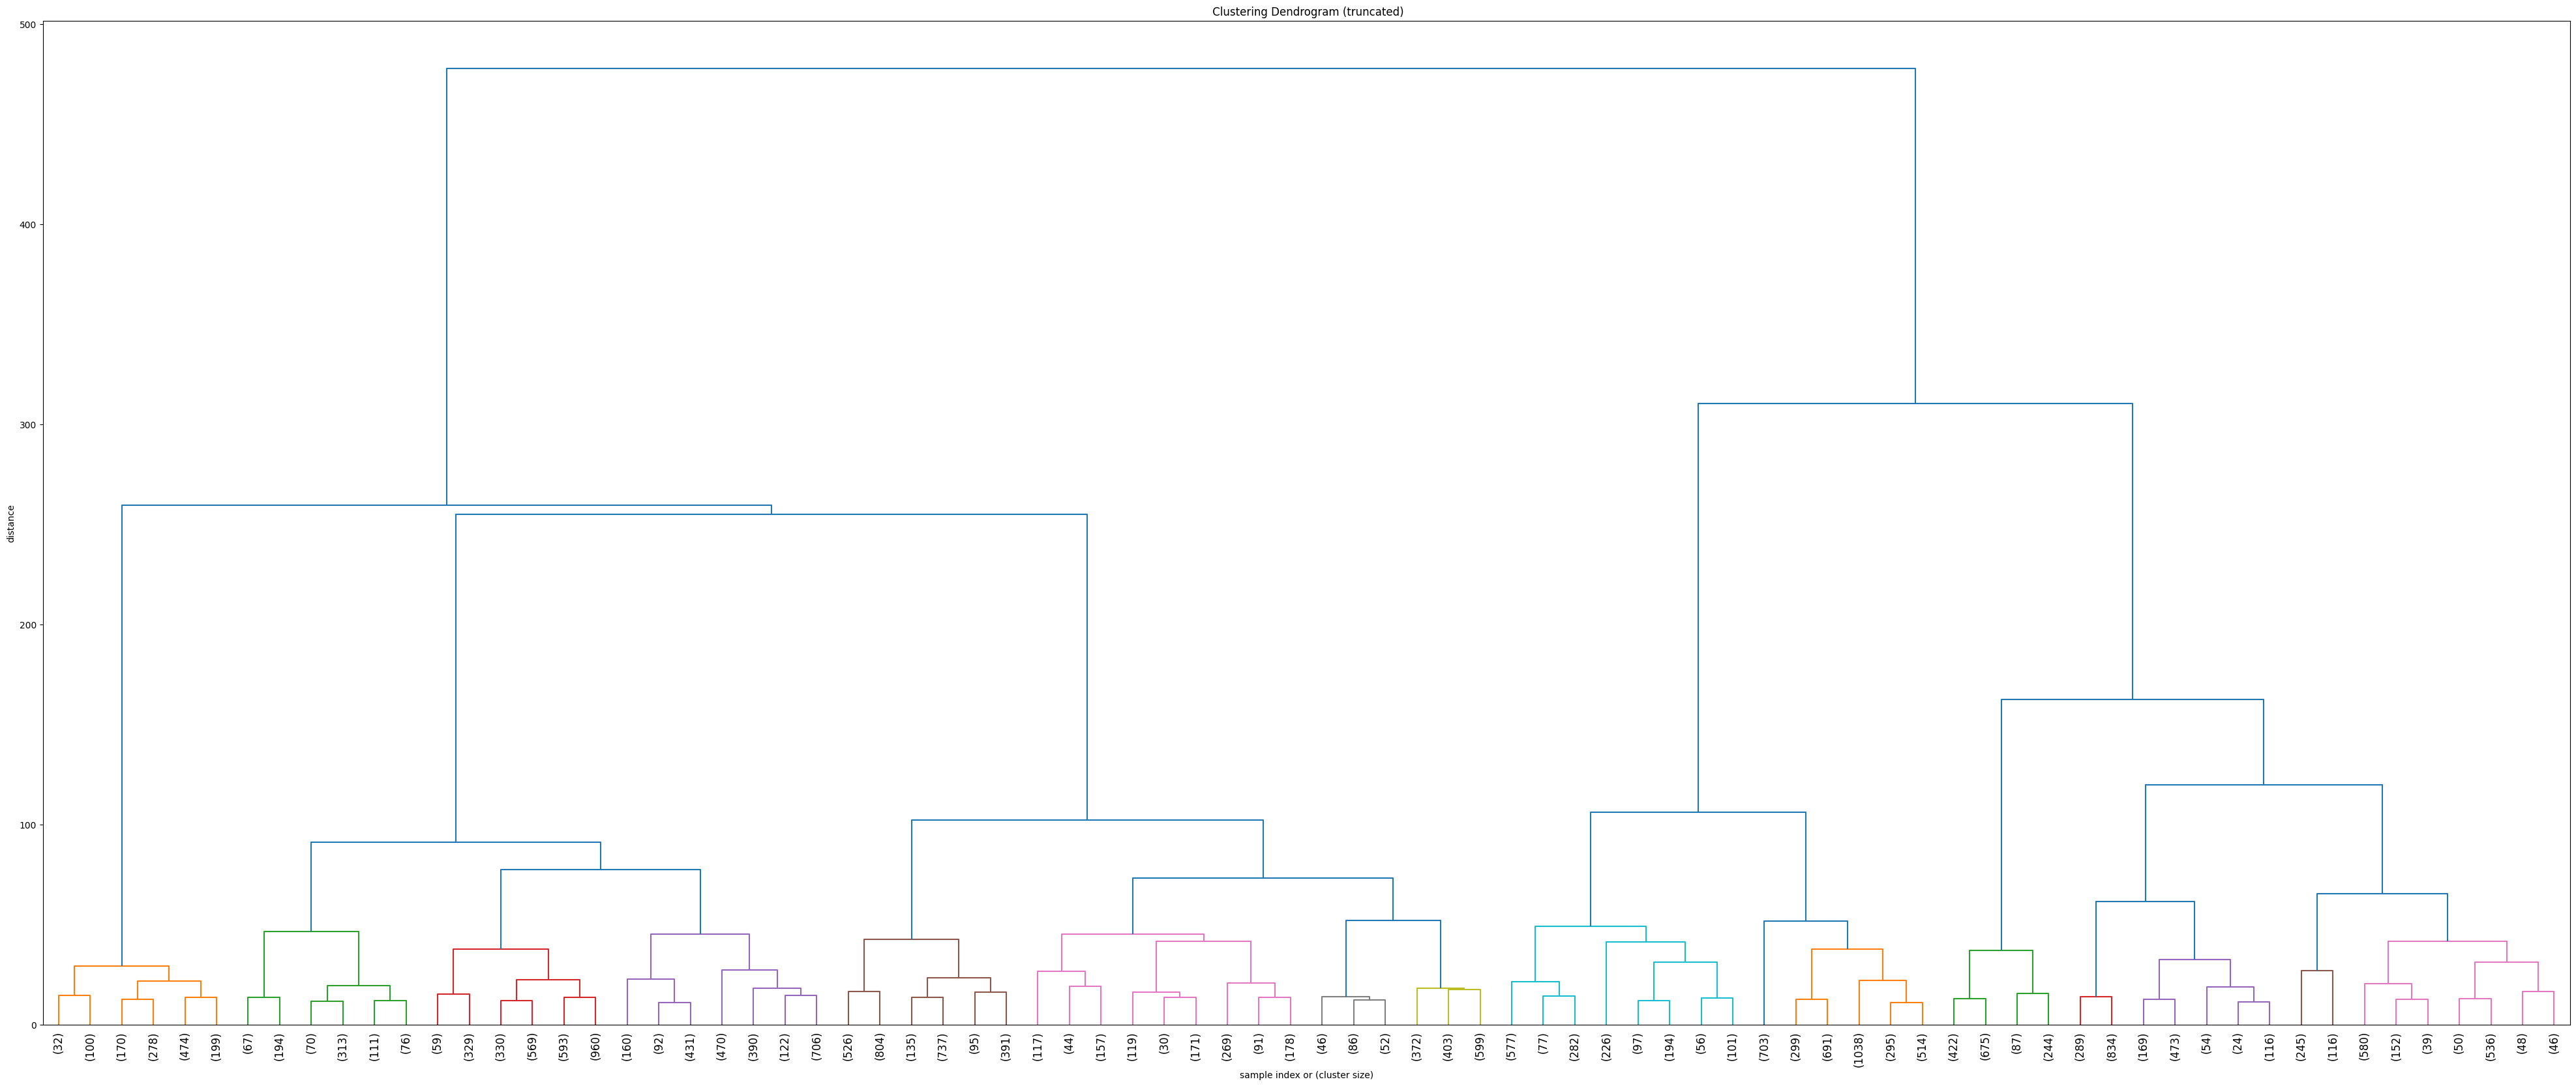

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(50, 20))
Z_Final = linkage(data_scale, 'ward', metric='euclidean')
plt.title(' Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=50
)
plt.show()

In [3]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_excel="/content/drive/MyDrive/file/PCA+India+Data_Census.xlsx"

In [7]:
df=pd.read_excel(path_excel)

In [8]:
df.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [9]:
df.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [10]:
df.shape

(640, 61)

In [11]:
df.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

In [12]:
df.info

<bound method DataFrame.info of      State Code  Dist.Code                     State                Area Name  \
0             1          1           Jammu & Kashmir                  Kupwara   
1             1          2           Jammu & Kashmir                   Badgam   
2             1          3           Jammu & Kashmir              Leh(Ladakh)   
3             1          4           Jammu & Kashmir                   Kargil   
4             1          5           Jammu & Kashmir                    Punch   
..          ...        ...                       ...                      ...   
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman

In [13]:
for i in df.columns:
  print(i,df[i].isnull().sum())

State Code 0
Dist.Code 0
State 0
Area Name 0
No_HH 0
TOT_M 0
TOT_F 0
M_06 0
F_06 0
M_SC 0
F_SC 0
M_ST 0
F_ST 0
M_LIT 0
F_LIT 0
M_ILL 0
F_ILL 0
TOT_WORK_M 0
TOT_WORK_F 0
MAINWORK_M 0
MAINWORK_F 0
MAIN_CL_M 0
MAIN_CL_F 0
MAIN_AL_M 0
MAIN_AL_F 0
MAIN_HH_M 0
MAIN_HH_F 0
MAIN_OT_M 0
MAIN_OT_F 0
MARGWORK_M 0
MARGWORK_F 0
MARG_CL_M 0
MARG_CL_F 0
MARG_AL_M 0
MARG_AL_F 0
MARG_HH_M 0
MARG_HH_F 0
MARG_OT_M 0
MARG_OT_F 0
MARGWORK_3_6_M 0
MARGWORK_3_6_F 0
MARG_CL_3_6_M 0
MARG_CL_3_6_F 0
MARG_AL_3_6_M 0
MARG_AL_3_6_F 0
MARG_HH_3_6_M 0
MARG_HH_3_6_F 0
MARG_OT_3_6_M 0
MARG_OT_3_6_F 0
MARGWORK_0_3_M 0
MARGWORK_0_3_F 0
MARG_CL_0_3_M 0
MARG_CL_0_3_F 0
MARG_AL_0_3_M 0
MARG_AL_0_3_F 0
MARG_HH_0_3_M 0
MARG_HH_0_3_F 0
MARG_OT_0_3_M 0
MARG_OT_0_3_F 0
NON_WORK_M 0
NON_WORK_F 0


In [14]:
#Check for presence of duplicate rows
df.duplicated().sum()

0

In [15]:
PCA_num=df.iloc[:,4:61]

In [16]:
PCA_num

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0     7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1     6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2     4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3     1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4    11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   
..     ...    ...    ...   ...   ...   ...   ...   ...    ...    ...  ...   
635   3333   8154  11781  1146  1203    21    30     0      0   6916  ...   
636  10612  12346  21691  1544  1533  2234  4155     0      0  10292  ...   
637   1275   1549   2630   227   225     0     0  1012   1750   1187  ...   
638   3762   5200   8012   723   664     0     0    28     50   4206  ...   
639   7975  11977  18049  1470  1358     0     0   161    264  10095  ...   

     MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0             1150            749            180            237   
1              525            715            123            229   
2              114            188             44             89   
3              194            247             61            128   
4              874           1928            465           1043   
..             ...            ...            ...            ...   
635             32             47              0              0   
636            155            337              3             14   
637            104            134              9              4   
638            136            172             24             44   
639            173            122              6              2   

     MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0              680            252             32             46         258   
1              186            148             76            178         140   
2                3             34              0              4          67   
3               13             50              4             10         116   
4              205            302             24            105         180   
..             ...            ...            ...            ...         ...   
635              0              0              0              0          32   
636             38            130              4             23         110   
637              2              6             17             47          76   
638             11             21              1              4         100   
639             17             17              2              4         148   

     NON_WORK_F  
0           214  
1           160  
2            61  
3            59  
4           478  
..          ...  
635          47  
636         170  
637          77  
638         103  
639          99  

[640 rows x 57 columns]

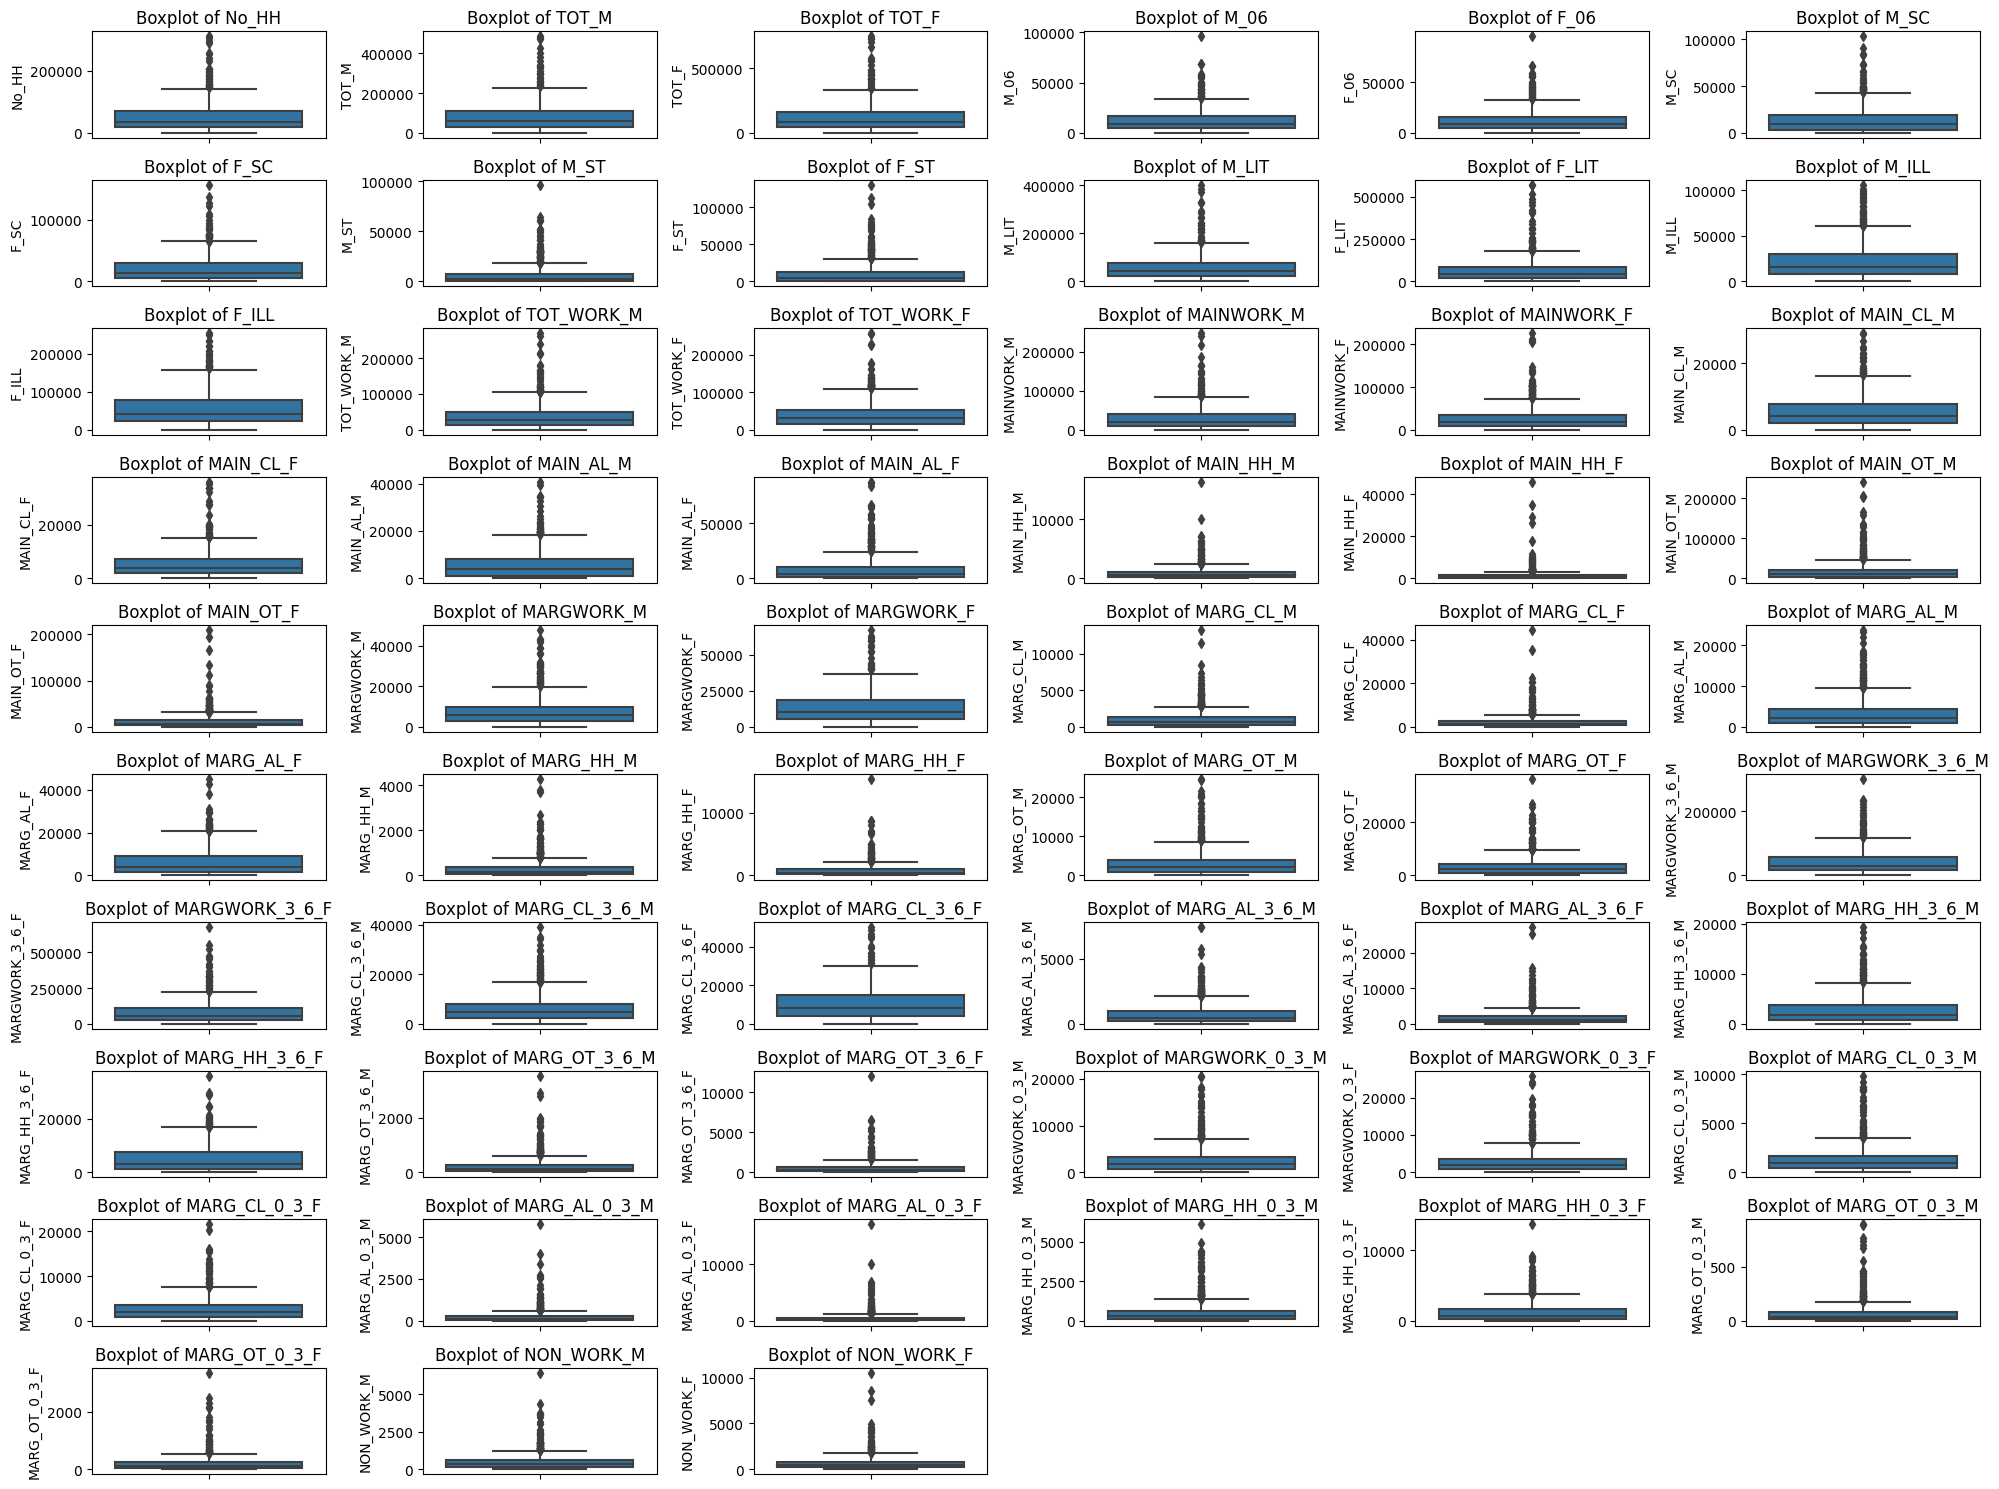

In [17]:
plt.figure(figsize = (20,15))
feature_list = PCA_num.columns
for i in range(len(feature_list)):
    plt.subplot(10, 6, i + 1)
    sns.boxplot(y = PCA_num [feature_list[i]], data = PCA_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

1.   which state has highest number of males ?
2.   which state has lowest  number of males ?

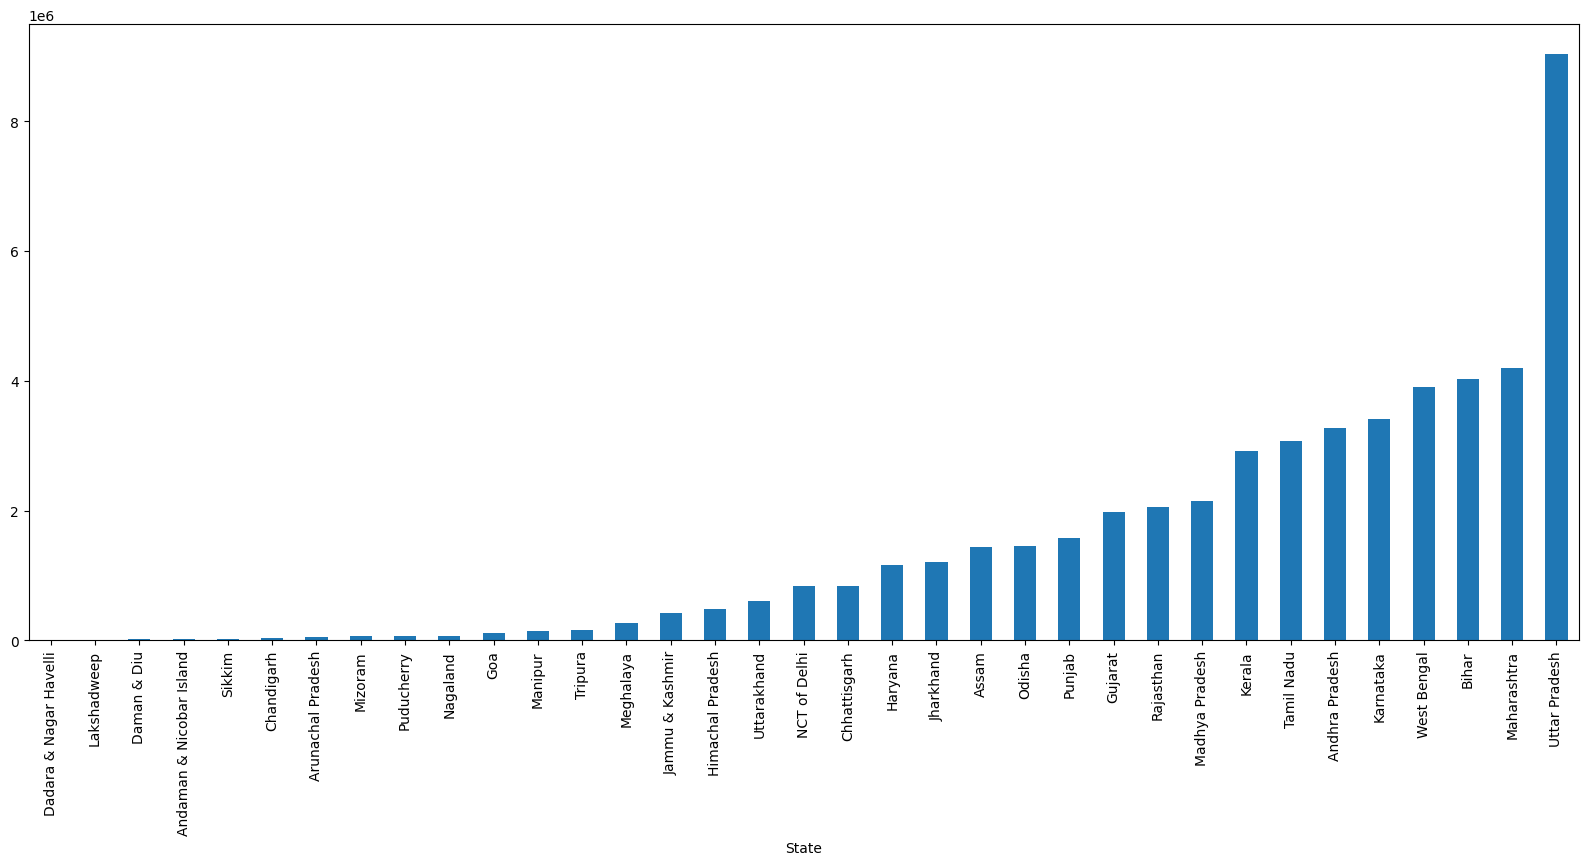

In [18]:
plt.figure(figsize=(20,8))
df.groupby('State').sum()['TOT_M'].sort_values(ascending = True).plot(kind = 'bar');

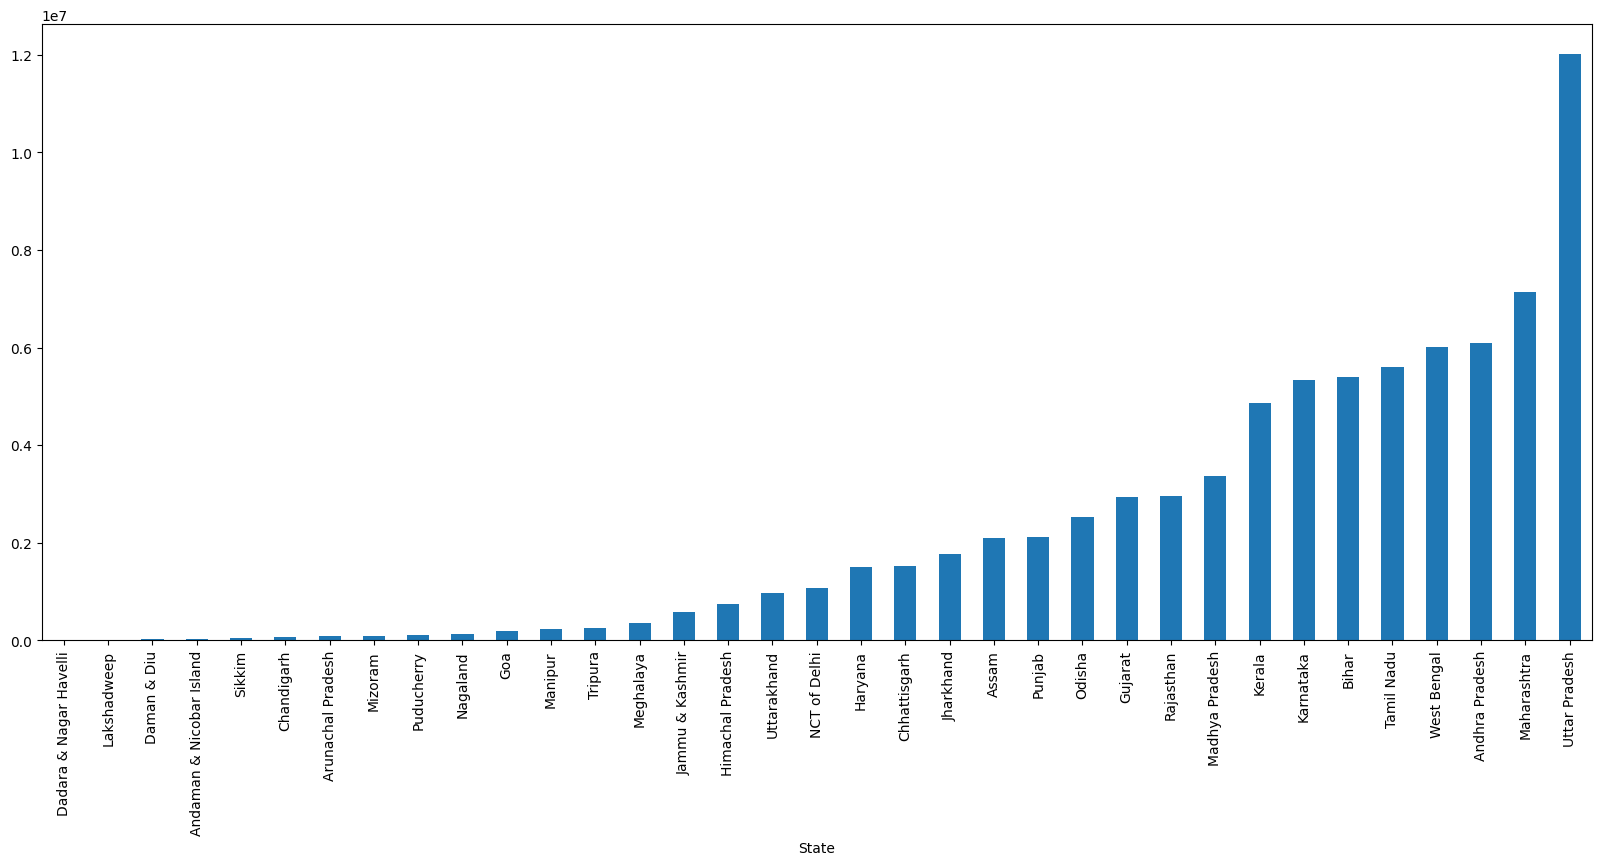

In [77]:
plt.figure(figsize=(20,8))
df.groupby('State').sum()['TOT_F'].sort_values(ascending = True).plot(kind = 'bar');

In [ ]:
1) Which state has maximum number of literate females? 2)Which state has maximum number of literate males?

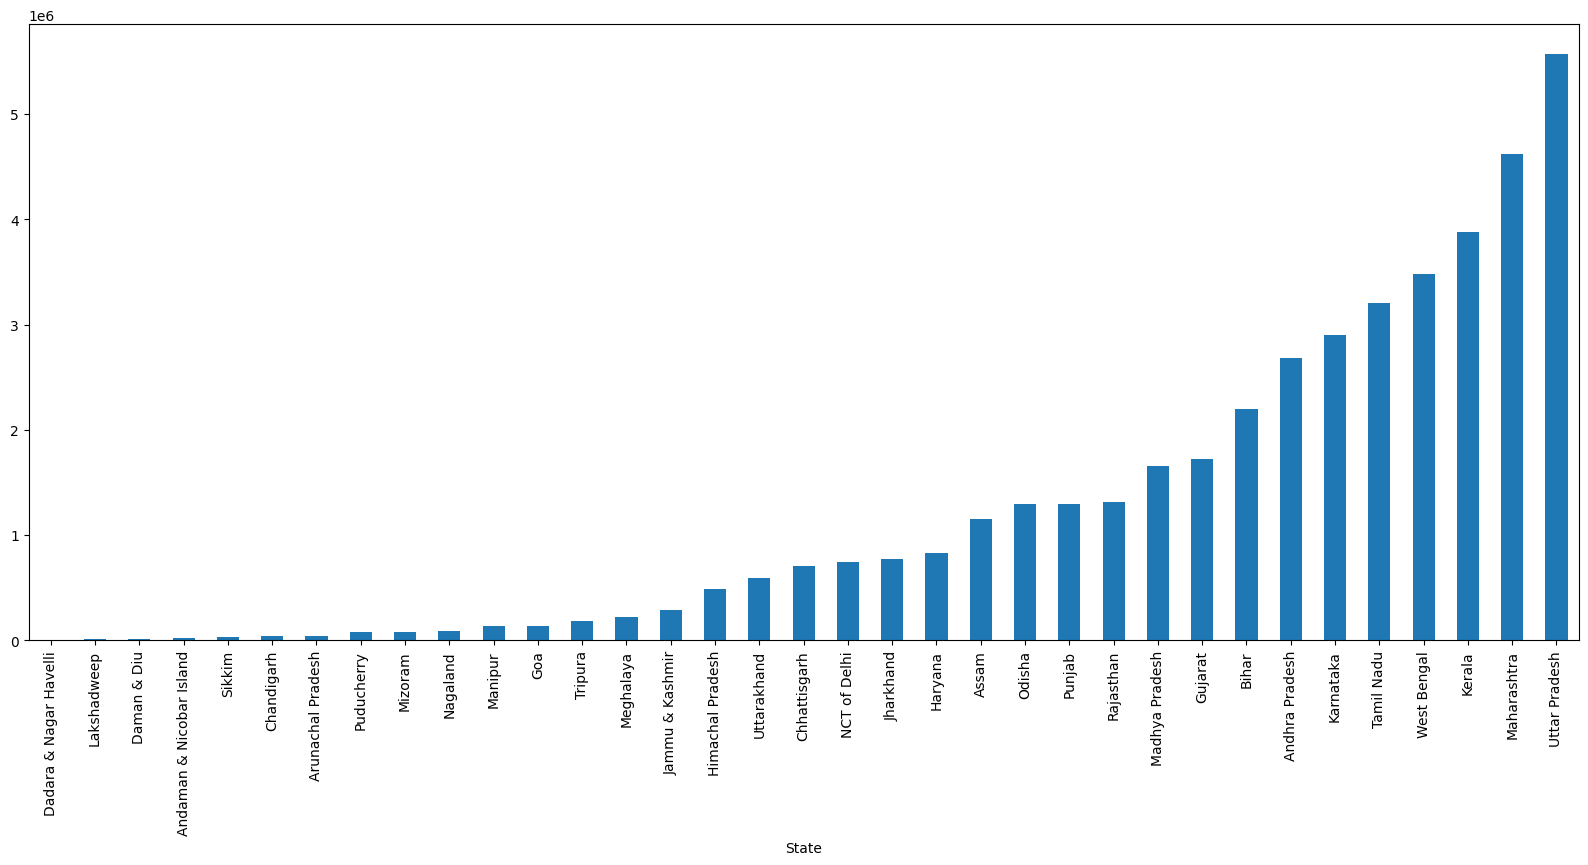

In [78]:
plt.figure(figsize=(20,8))
df.groupby('State').sum()['F_LIT'].sort_values(ascending = True).plot(kind = 'bar');

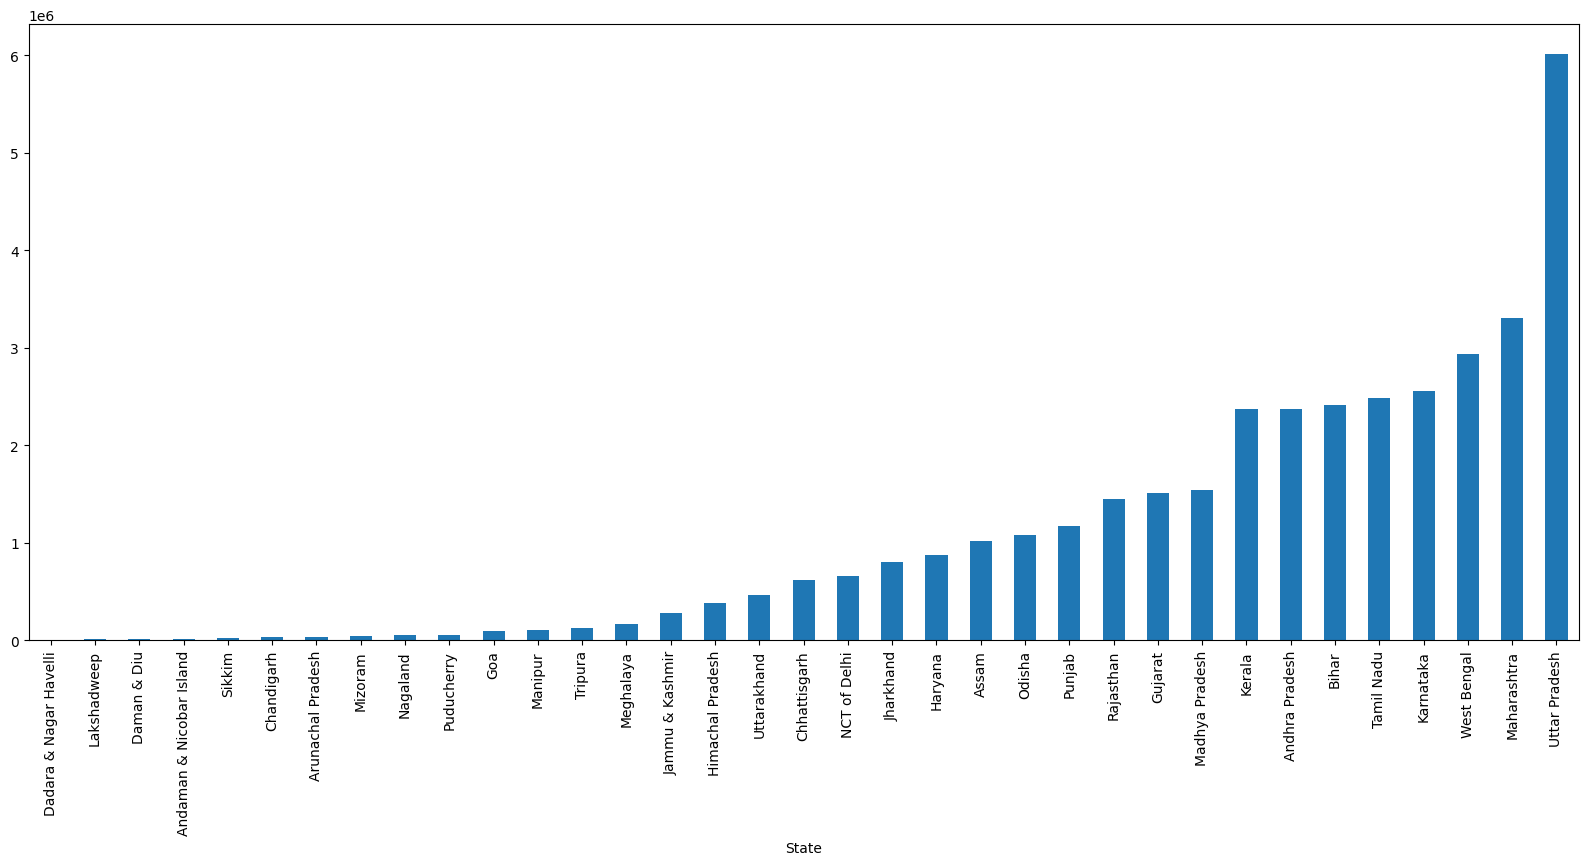

In [79]:
plt.figure(figsize=(20,8))
df.groupby('State').sum()['M_LIT'].sort_values(ascending = True).plot(kind = 'bar');

which state has most non working males?
Which state has most non working female?

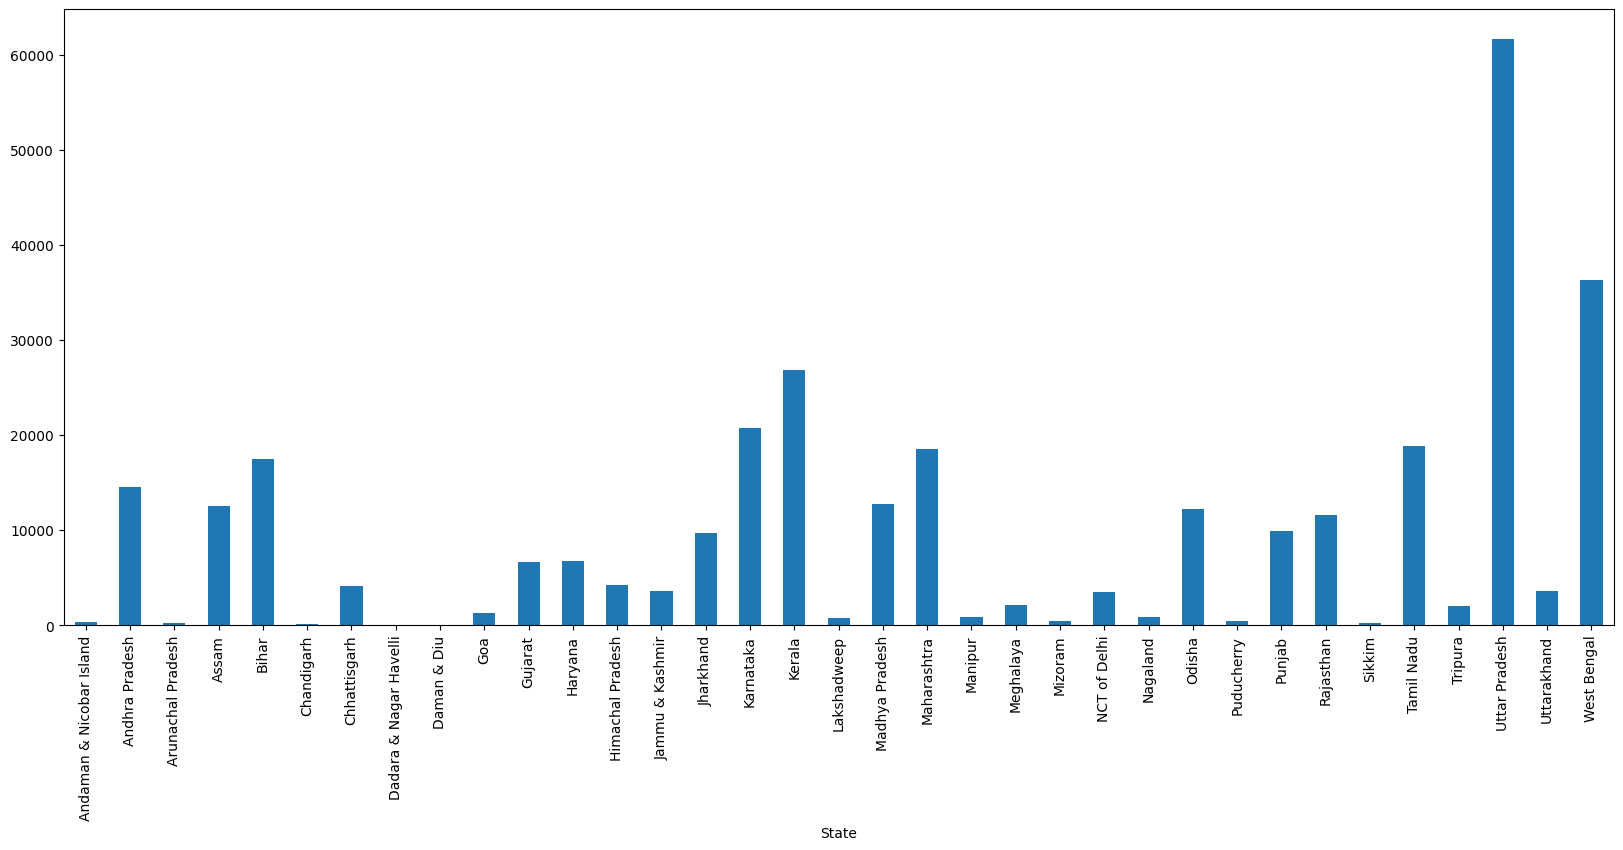

In [80]:
plt.figure(figsize=(20,8))
df.groupby('State').sum()['NON_WORK_M'].plot(kind = 'bar');

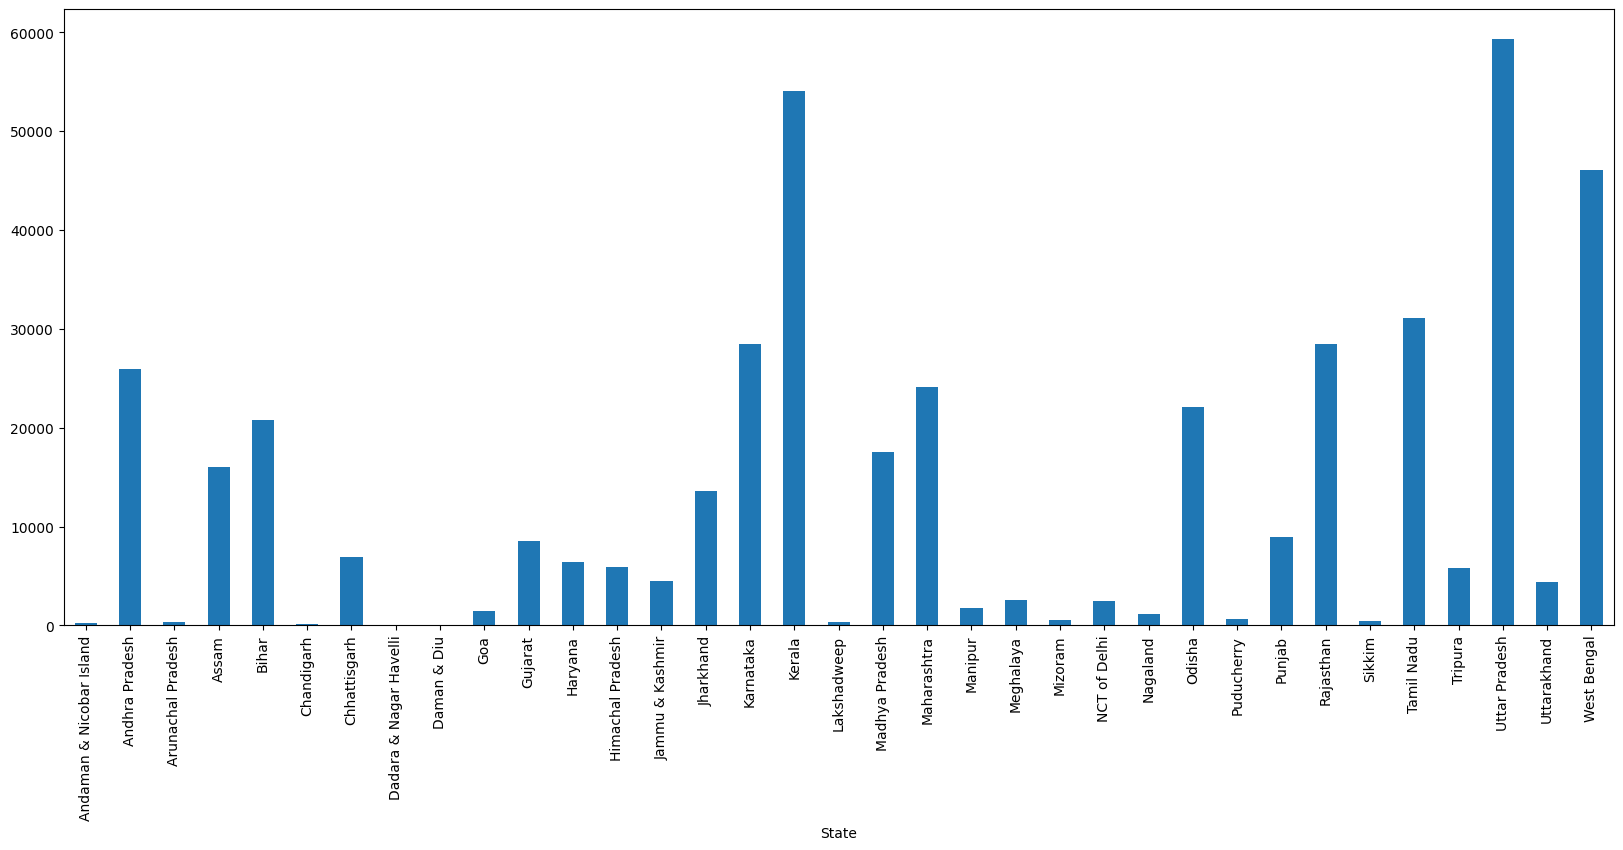

In [81]:
plt.figure(figsize=(20,8))
df.groupby('State').sum()['NON_WORK_F'].plot(kind = 'bar');

Z-score

In [19]:
cat=[]
num=[]
for i in PCA_num.columns:
    if PCA_num[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

[]
['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M', 'NON_WORK_F']


In [20]:
from scipy.stats import zscore

In [21]:
data_scaled=PCA_num[num].apply(zscore)

In [22]:
data_scaled.describe().T

count          mean       std       min       25%       50%  \
No_HH           640.0  4.440892e-17  1.000782 -1.057697 -0.659882 -0.319887   
TOT_M           640.0 -8.881784e-17  1.000782 -1.084858 -0.677956 -0.294592   
TOT_F           640.0 -4.440892e-17  1.000782 -1.071906 -0.668250 -0.305233   
M_06            640.0 -5.551115e-17  1.000782 -1.066236 -0.659189 -0.274114   
F_06            640.0  6.661338e-17  1.000782 -1.050264 -0.642376 -0.289756   
M_SC            640.0  5.551115e-18  1.000782 -0.958783 -0.718323 -0.293404   
F_SC            640.0 -5.551115e-17  1.000782 -0.957049 -0.698964 -0.325615   
M_ST            640.0 -4.440892e-17  1.000782 -0.625124 -0.595467 -0.389534   
F_ST            640.0 -2.220446e-17  1.000782 -0.640197 -0.613122 -0.398476   
M_LIT           640.0 -4.440892e-17  1.000782 -1.032495 -0.656385 -0.273410   
F_LIT           640.0  0.000000e+00  1.000782 -0.880091 -0.605869 -0.300924   
M_ILL           640.0  3.885781e-17  1.000782 -1.103860 -0.675544 -0.313229   
F_ILL           640.0 -4.440892e-17  1.000782 -1.182788 -0.714648 -0.289434   
TOT_WORK_M      640.0 -4.440892e-17  1.000782 -1.041256 -0.666067 -0.276329   
TOT_WORK_F      640.0 -8.881784e-17  1.000782 -1.101591 -0.678035 -0.288114   
MAINWORK_M      640.0 -2.220446e-17  1.000782 -0.958137 -0.649073 -0.284647   
MAINWORK_F      640.0  4.440892e-17  1.000782 -0.932745 -0.623743 -0.324100   
MAIN_CL_M       640.0 -8.881784e-17  1.000782 -1.145474 -0.718165 -0.266889   
MAIN_CL_F       640.0 -1.110223e-17  1.000782 -1.030785 -0.669985 -0.296408   
MAIN_AL_M       640.0  0.000000e+00  1.000782 -0.914709 -0.747338 -0.299102   
MAIN_AL_F       640.0  4.440892e-17  1.000782 -0.694401 -0.584807 -0.388393   
MAIN_HH_M       640.0  1.665335e-17  1.000782 -0.691816 -0.545061 -0.301644   
MAIN_HH_F       640.0  0.000000e+00  1.000782 -0.434625 -0.356326 -0.264492   
MAIN_OT_M       640.0  0.000000e+00  1.000782 -0.691455 -0.539371 -0.324365   
MAIN_OT_F       640.0 -4.440892e-17  1.000782 -0.646347 -0.488651 -0.317847   
MARGWORK_M      640.0 -1.665335e-17  1.000782 -1.046990 -0.655025 -0.291825   
MARGWORK_F      640.0  2.220446e-17  1.000782 -1.181294 -0.698262 -0.265922   
MARG_CL_M       640.0  0.000000e+00  1.000782 -0.794140 -0.556257 -0.331347   
MARG_CL_F       640.0 -5.551115e-17  1.000782 -0.647891 -0.470946 -0.303687   
MARG_AL_M       640.0  1.110223e-17  1.000782 -0.874484 -0.643314 -0.328780   
MARG_AL_F       640.0  2.220446e-17  1.000782 -0.954894 -0.747687 -0.360900   
MARG_HH_M       640.0 -5.551115e-18  1.000782 -0.685144 -0.529942 -0.326070   
MARG_HH_F       640.0  1.110223e-17  1.000782 -0.656736 -0.513346 -0.298574   
MARG_OT_M       640.0  1.110223e-17  1.000782 -0.864853 -0.607407 -0.302269   
MARG_OT_F       640.0 -4.440892e-17  1.000782 -0.856115 -0.600094 -0.289356   
MARGWORK_3_6_M  640.0  7.216450e-17  1.000782 -1.067727 -0.659748 -0.298173   
MARGWORK_3_6_F  640.0 -2.220446e-17  1.000782 -0.973823 -0.656854 -0.292903   
MARG_CL_3_6_M   640.0 -2.220446e-17  1.000782 -1.058667 -0.668815 -0.293426   
MARG_CL_3_6_F   640.0 -8.881784e-17  1.000782 -1.212036 -0.707773 -0.241685   
MARG_AL_3_6_M   640.0 -4.440892e-17  1.000782 -0.872827 -0.612586 -0.341847   
MARG_AL_3_6_F   640.0  4.440892e-17  1.000782 -0.701351 -0.502020 -0.306297   
MARG_HH_3_6_M   640.0 -7.216450e-17  1.000782 -0.897436 -0.662335 -0.336627   
MARG_HH_3_6_F   640.0 -6.661338e-17  1.000782 -0.969686 -0.760784 -0.351845   
MARG_OT_3_6_M   640.0 -5.551115e-18  1.000782 -0.684513 -0.522705 -0.323234   
MARG_OT_3_6_F   640.0  3.330669e-17  1.000782 -0.651473 -0.509422 -0.295094   
MARGWORK_0_3_M  640.0  0.000000e+00  1.000782 -0.859800 -0.613309 -0.307996   
MARGWORK_0_3_F  640.0  0.000000e+00  1.000782 -0.848224 -0.601775 -0.300744   
MARG_CL_0_3_M   640.0 -2.775558e-17  1.000782 -0.933110 -0.606952 -0.298260   
MARG_CL_0_3_F   640.0 -5.551115e-17  1.000782 -0.978631 -0.645877 -0.297513   
MARG_AL_0_3_M   640.0  2.220446e-17  1.000782 -0.553861 -0.450104 

NameError: ignored

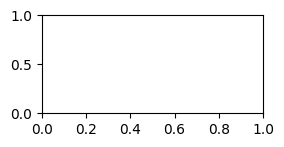

In [23]:
plt.figure(figsize = (20,15))
feature_list = PCA_num.columns
for i in range(len(feature_list)):
    plt.subplot(10, 6, i + 1)
    sns.boxplot(y = data_scaled [feature_list[i]], data = data_scale)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

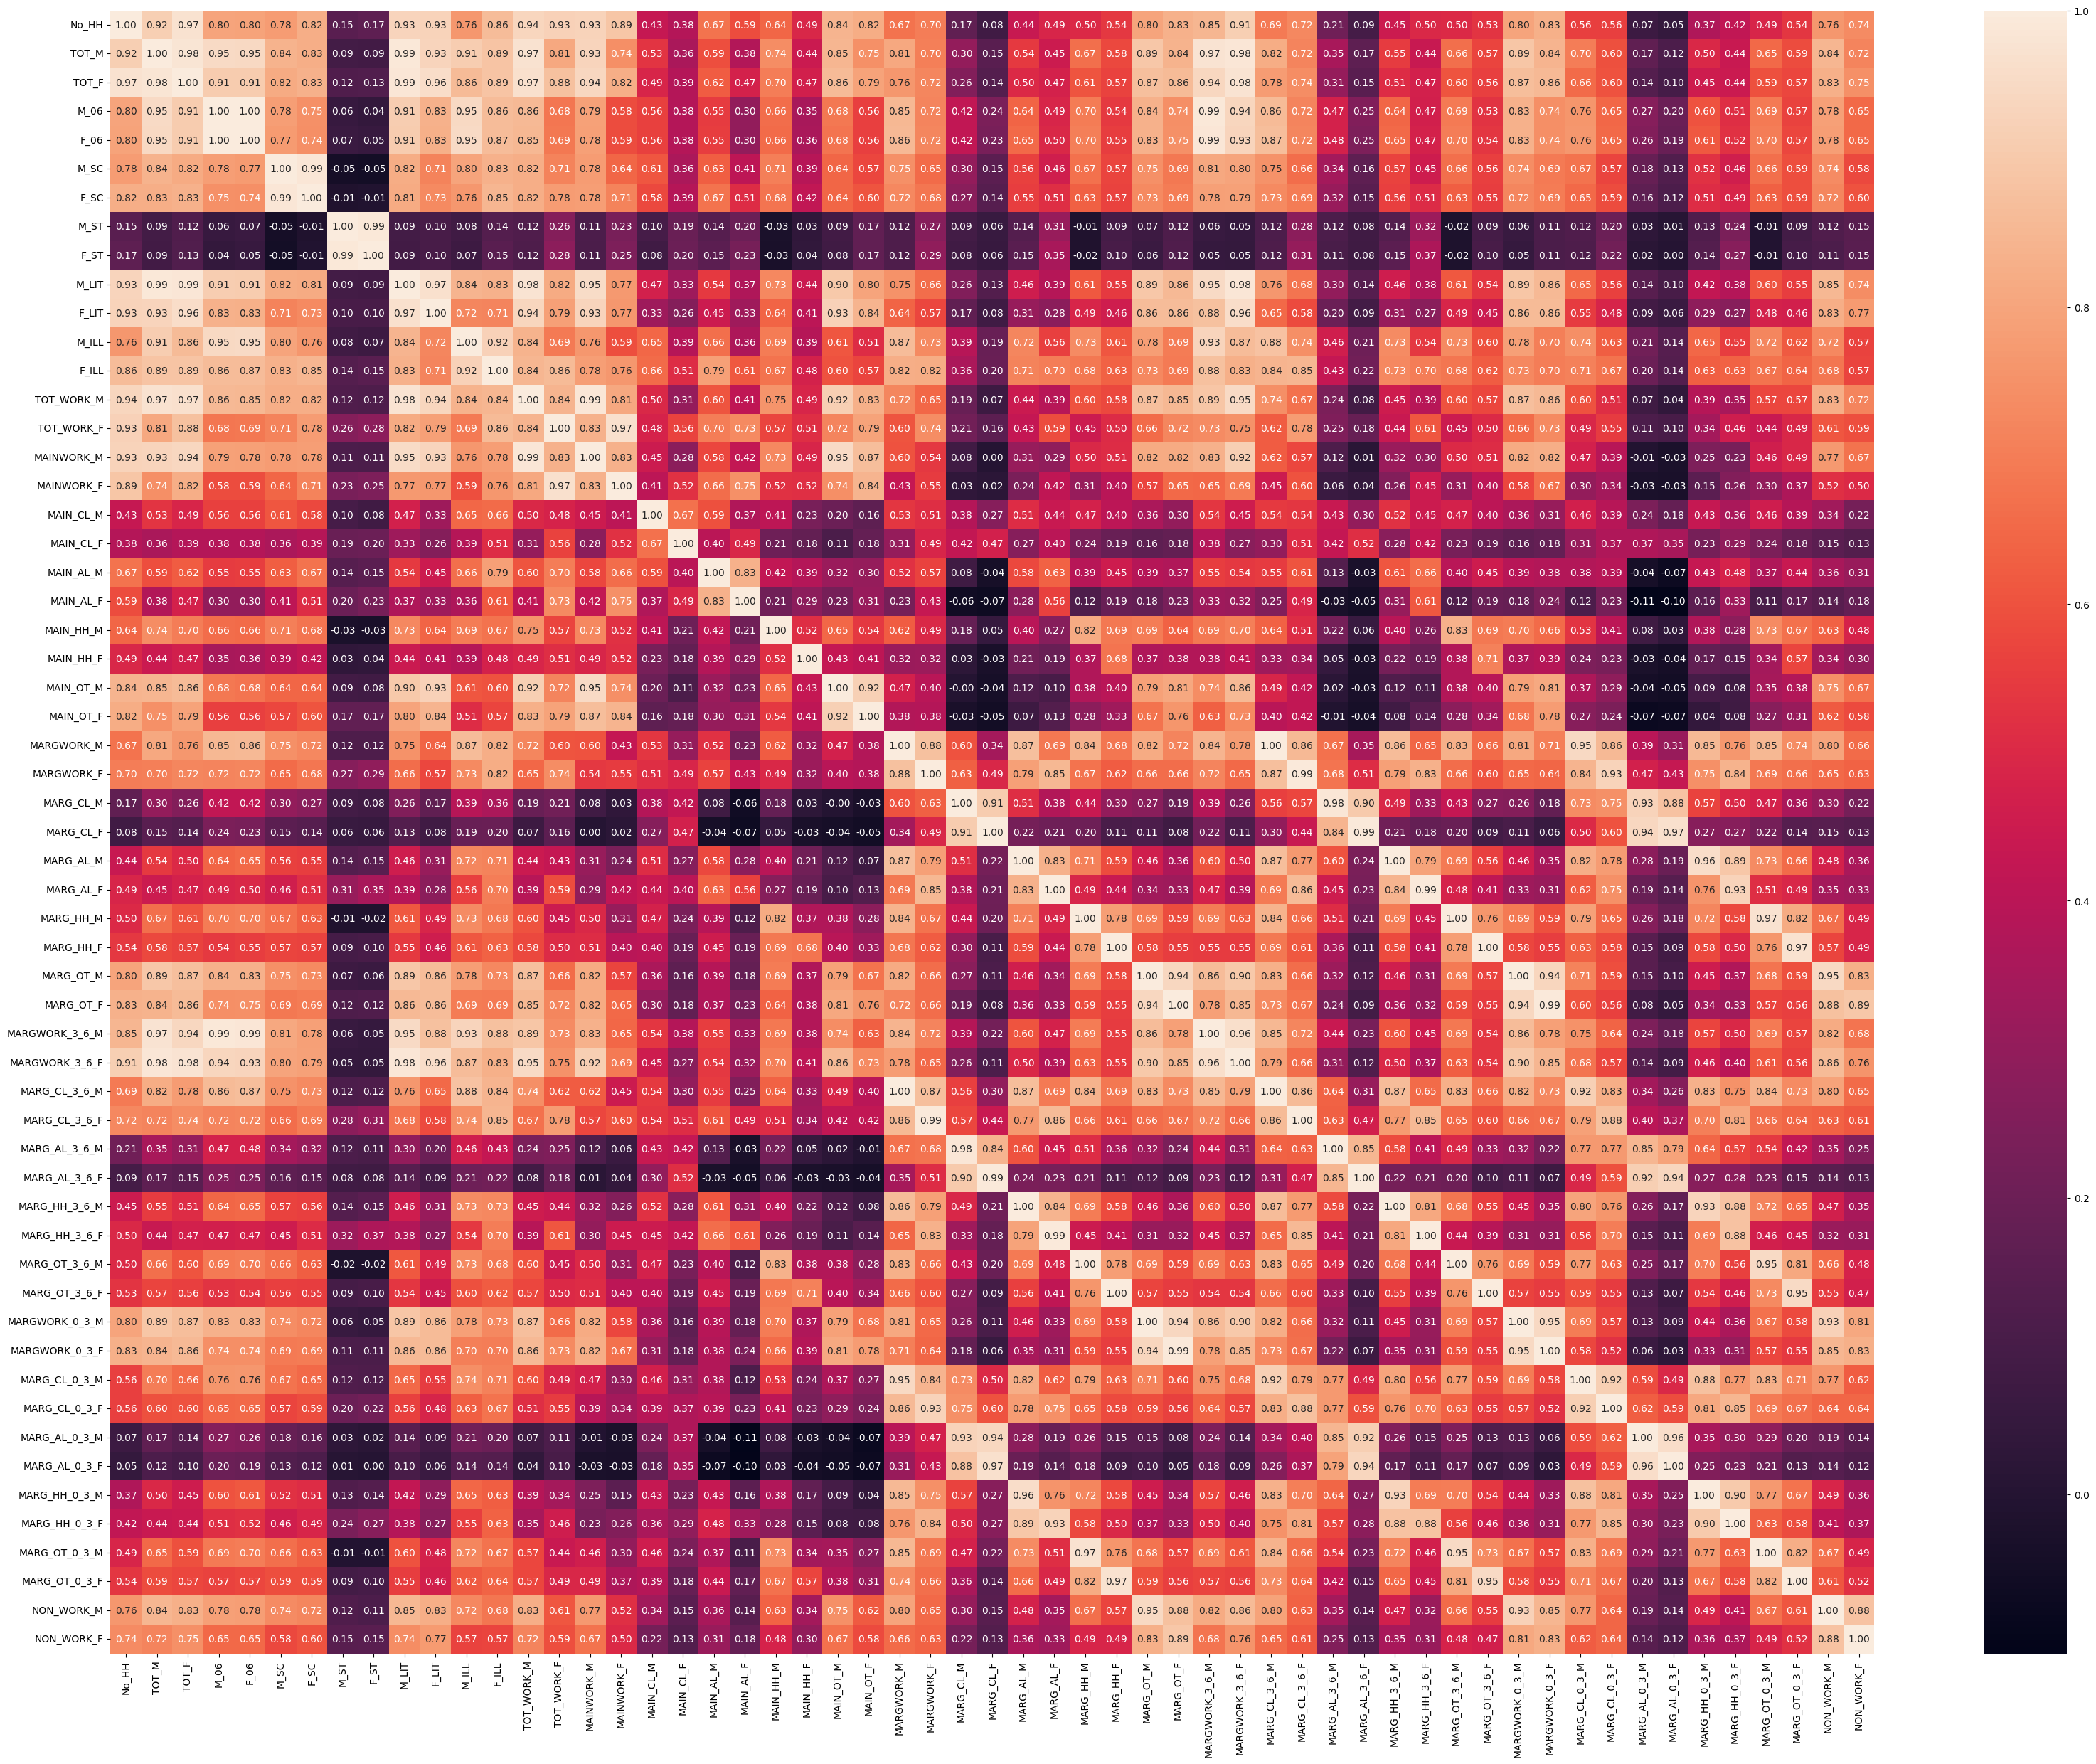

In [24]:
#Check for presence of correlations
plt.figure(figsize = (40,30))
sns.heatmap(data_scaled.corr(), annot=True,fmt='.2f');

In [25]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 36.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=ee2e53087aa73ccd31d68f8648a14b6226e293af1e891ee3033d7f8e56d252a0
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


Baetlett

In [27]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_scaled)
p_value

/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

KMO Test

In [28]:
#Confirm the adequacy of sample size.
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_scaled)
kmo_model

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8039889932781807

In [29]:
#Check the number of features
len(data_scaled.columns)

57

In [30]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(data_scaled)

In [31]:
#Extract eigen vectors
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.37643683,  0.15058437, ...,  0.03363703,
        -0.07959556, -0.02552519],
       [-0.        ,  0.2448199 ,  0.09383958, ..., -0.02638552,
        -0.01672564,  0.03567243],
       [-0.        , -0.09325898, -0.0110033 , ...,  0.01165739,
        -0.01279215, -0.00377366]])

In [32]:
#Check the eigen values
#Note: This is always returned in descending order
cf=pca.explained_variance_ratio_

In [33]:
cf

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [34]:
np.cumsum(cf)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [35]:
cov_matrix = np.cov(data_scaled, rowvar = False)

In [36]:
cov_matrix

array([[1.00156495, 0.91760364, 0.97210871, ..., 0.53769433, 0.76357722,
        0.73684378],
       [0.91760364, 1.00156495, 0.98417823, ..., 0.5891007 , 0.84621844,
        0.71718181],
       [0.97210871, 0.98417823, 1.00156495, ..., 0.572748  , 0.82894851,
        0.74775097],
       ...,
       [0.53769433, 0.5891007 , 0.572748  , ..., 1.00156495, 0.61052325,
        0.52191235],
       [0.76357722, 0.84621844, 0.82894851, ..., 0.61052325, 1.00156495,
        0.88228018],
       [0.73684378, 0.71718181, 0.74775097, ..., 0.52191235, 0.88228018,
        1.00156495]])

In [37]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

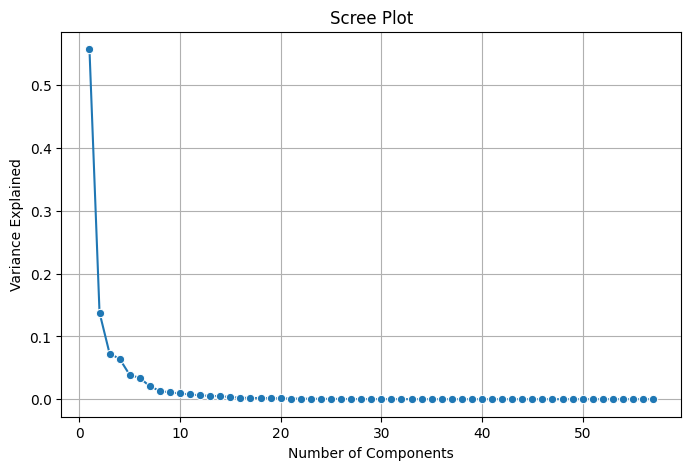

In [38]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=cf,x=range(1,len(cf)+1),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

n=5

In [39]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=123)
pca_transformed = pca.fit_transform(data_scaled)

In [40]:
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [41]:
pca_df=pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5'],index=data_scaled.columns)

In [42]:
pca_df

PC1       PC2       PC3       PC4       PC5
No_HH           0.156021 -0.126347 -0.002690 -0.125293 -0.007022
TOT_M           0.167118 -0.089677  0.056698 -0.019942 -0.033026
TOT_F           0.165553 -0.104912  0.038749 -0.070873 -0.012847
M_06            0.162193 -0.022095  0.057788  0.011917 -0.050248
F_06            0.162566 -0.020271  0.050126  0.014844 -0.043848
M_SC            0.151358 -0.045111  0.002569  0.012485 -0.173007
F_SC            0.151567 -0.051924 -0.025101 -0.029893 -0.159803
M_ST            0.027234  0.027679 -0.123504 -0.222247  0.433163
F_ST            0.028183  0.030223 -0.139769 -0.229754  0.438792
M_LIT           0.161993 -0.115355  0.082168 -0.035163 -0.009101
F_LIT           0.146873 -0.153109  0.117098 -0.059559  0.055844
M_ILL           0.161749 -0.006625 -0.021855  0.025348 -0.096580
F_ILL           0.165248 -0.009107 -0.093062 -0.076023 -0.119911
TOT_WORK_M      0.159872 -0.133529  0.045176 -0.040154 -0.019553
TOT_WORK_F      0.145936 -0.085087 -0.059450 -0.225160 -0.040437
MAINWORK_M      0.146201 -0.176368  0.054295 -0.068351 -0.036802
MAINWORK_F      0.123970 -0.151413 -0.055609 -0.246640 -0.082834
MAIN_CL_M       0.103127  0.062415 -0.067399 -0.089769 -0.286039
MAIN_CL_F       0.074540  0.086477 -0.009238 -0.288965 -0.241936
MAIN_AL_M       0.113356 -0.031040 -0.247917 -0.136082 -0.205724
MAIN_AL_F       0.073882 -0.058688 -0.251932 -0.290042 -0.177605
MAIN_HH_M       0.131573 -0.076021  0.026569  0.152366 -0.134089
MAIN_HH_F       0.083383 -0.082477 -0.060523  0.048950 -0.139441
MAIN_OT_M       0.123526 -0.212984  0.137378 -0.040289  0.064638
MAIN_OT_F       0.111021 -0.210071  0.095634 -0.120391  0.080743
MARGWORK_M      0.164615  0.092994 -0.008628  0.093018  0.060244
MARGWORK_F      0.155396  0.125270 -0.049370 -0.088707  0.089202
MARG_CL_M       0.082389  0.269450  0.198754 -0.062761 -0.022263
MARG_CL_F       0.049195  0.246547  0.268787 -0.168402 -0.059205
MARG_AL_M       0.128599  0.165831 -0.189868  0.091787  0.019422
MARG_AL_F       0.114305  0.140958 -0.267768 -0.106365  0.080527
MARG_HH_M       0.140853  0.068068 -0.021257  0.237985 -0.059971
MARG_HH_F       0.127670  0.024216 -0.082504  0.196321 -0.033602
MARG_OT_M       0.155263 -0.089442  0.111713  0.087119  0.119121
MARG_OT_F       0.147287 -0.117899  0.100046  0.026729  0.166882
MARGWORK_3_6_M  0.164972 -0.043995  0.064423 -0.000026 -0.043834
MARGWORK_3_6_F  0.161253 -0.105502  0.079704  0.003894  0.000537
MARG_CL_3_6_M   0.165502  0.077193 -0.024205  0.092875  0.054073
MARG_CL_3_6_F   0.155647  0.103174 -0.072013 -0.107860  0.073050
MARG_AL_3_6_M   0.093014  0.264409  0.153518 -0.038488 -0.007789
MARG_AL_3_6_F   0.051536  0.244261  0.256213 -0.179691 -0.061303
MARG_HH_3_6_M   0.128576  0.158783 -0.200119  0.080411  0.008457
MARG_HH_3_6_F   0.110646  0.125287 -0.279866 -0.136240  0.064109
MARG_OT_3_6_M   0.139593  0.062262 -0.020618  0.237745 -0.066400
MARG_OT_3_6_F   0.124546  0.014766 -0.082794  0.190511 -0.044810
MARGWORK_0_3_M  0.154294 -0.093159  0.110285  0.086479  0.108829
MARGWORK_0_3_F  0.146286 -0.125596  0.095667  0.027275  0.141190
MARG_CL_0_3_M   0.150126  0.150681  0.054892  0.087433  0.081185
MARG_CL_0_3_F   0.140157  0.180690  0.023982 -0.022290  0.129936
MARG_AL_0_3_M   0.052542  0.251328  0.268330 -0.104686 -0.048849
MARG_AL_0_3_F   0.041786  0.240720  0.284956 -0.135716 -0.051895
MARG_HH_0_3_M   0.121840  0.185277 -0.138628  0.132544  0.062380
MARG_HH_0_3_F   0.116011  0.180616 -0.202198  0.004051  0.128308
MARG_OT_0_3_M   0.139869  0.084869 -0.022599  0.230038 -0.036390
MARG_OT_0_3_F   0.132192  0.050813 -0.078720  0.206201  0.000165
NON_WORK_M      0.150376 -0.065365  0.111827  0.084854  0.162862
NON_WORK_F      0.131066 -0.073847  0.102553  0.021124  0.238292

In [43]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5']
data_pca = pd.DataFrame(np.round(pca.components_[:5,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

PC1   PC2   PC3   PC4   PC5
No_HH           0.16 -0.13 -0.00 -0.13 -0.01
TOT_M           0.17 -0.09  0.06 -0.02 -0.03
TOT_F           0.17 -0.10  0.04 -0.07 -0.01
M_06            0.16 -0.02  0.06  0.01 -0.05
F_06            0.16 -0.02  0.05  0.01 -0.04
M_SC            0.15 -0.05  0.00  0.01 -0.17
F_SC            0.15 -0.05 -0.03 -0.03 -0.16
M_ST            0.03  0.03 -0.12 -0.22  0.43
F_ST            0.03  0.03 -0.14 -0.23  0.44
M_LIT           0.16 -0.12  0.08 -0.04 -0.01
F_LIT           0.15 -0.15  0.12 -0.06  0.06
M_ILL           0.16 -0.01 -0.02  0.03 -0.10
F_ILL           0.17 -0.01 -0.09 -0.08 -0.12
TOT_WORK_M      0.16 -0.13  0.05 -0.04 -0.02
TOT_WORK_F      0.15 -0.09 -0.06 -0.23 -0.04
MAINWORK_M      0.15 -0.18  0.05 -0.07 -0.04
MAINWORK_F      0.12 -0.15 -0.06 -0.25 -0.08
MAIN_CL_M       0.10  0.06 -0.07 -0.09 -0.29
MAIN_CL_F       0.07  0.09 -0.01 -0.29 -0.24
MAIN_AL_M       0.11 -0.03 -0.25 -0.14 -0.21
MAIN_AL_F       0.07 -0.06 -0.25 -0.29 -0.18
MAIN_HH_M       0.13 -0.08  0.03  0.15 -0.13
MAIN_HH_F       0.08 -0.08 -0.06  0.05 -0.14
MAIN_OT_M       0.12 -0.21  0.14 -0.04  0.06
MAIN_OT_F       0.11 -0.21  0.10 -0.12  0.08
MARGWORK_M      0.16  0.09 -0.01  0.09  0.06
MARGWORK_F      0.16  0.13 -0.05 -0.09  0.09
MARG_CL_M       0.08  0.27  0.20 -0.06 -0.02
MARG_CL_F       0.05  0.25  0.27 -0.17 -0.06
MARG_AL_M       0.13  0.17 -0.19  0.09  0.02
MARG_AL_F       0.11  0.14 -0.27 -0.11  0.08
MARG_HH_M       0.14  0.07 -0.02  0.24 -0.06
MARG_HH_F       0.13  0.02 -0.08  0.20 -0.03
MARG_OT_M       0.16 -0.09  0.11  0.09  0.12
MARG_OT_F       0.15 -0.12  0.10  0.03  0.17
MARGWORK_3_6_M  0.16 -0.04  0.06 -0.00 -0.04
MARGWORK_3_6_F  0.16 -0.11  0.08  0.00  0.00
MARG_CL_3_6_M   0.17  0.08 -0.02  0.09  0.05
MARG_CL_3_6_F   0.16  0.10 -0.07 -0.11  0.07
MARG_AL_3_6_M   0.09  0.26  0.15 -0.04 -0.01
MARG_AL_3_6_F   0.05  0.24  0.26 -0.18 -0.06
MARG_HH_3_6_M   0.13  0.16 -0.20  0.08  0.01
MARG_HH_3_6_F   0.11  0.13 -0.28 -0.14  0.06
MARG_OT_3_6_M   0.14  0.06 -0.02  0.24 -0.07
MARG_OT_3_6_F   0.12  0.01 -0.08  0.19 -0.04
MARGWORK_0_3_M  0.15 -0.09  0.11  0.09  0.11
MARGWORK_0_3_F  0.15 -0.13  0.10  0.03  0.14
MARG_CL_0_3_M   0.15  0.15  0.05  0.09  0.08
MARG_CL_0_3_F   0.14  0.18  0.02 -0.02  0.13
MARG_AL_0_3_M   0.05  0.25  0.27 -0.10 -0.05
MARG_AL_0_3_F   0.04  0.24  0.28 -0.14 -0.05
MARG_HH_0_3_M   0.12  0.19 -0.14  0.13  0.06
MARG_HH_0_3_F   0.12  0.18 -0.20  0.00  0.13
MARG_OT_0_3_M   0.14  0.08 -0.02  0.23 -0.04
MARG_OT_0_3_F   0.13  0.05 -0.08  0.21  0.00
NON_WORK_M      0.15 -0.07  0.11  0.08  0.16
NON_WORK_F      0.13 -0.07  0.10  0.02  0.24

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['PC1'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['PC2'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['PC3'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['PC4'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['PC1'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['PC2'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['PC3'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['PC4'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['PC1', 'PC2'], ['PC2', 'PC3'], ['PC3', 'PC4'], ['PC4', 'PC5']]], **{})
chart

In [44]:
def color_high(val):
    if val <= -0.16: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.16:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

In [48]:
## print('The Linear eq of 1st component: ')
for i in range(0,data_scaled.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),data_scaled.columns[i]),end=' (+) ')

0.16 * No_HH (+) 0.17 * TOT_M (+) 0.17 * TOT_F (+) 0.16 * M_06 (+) 0.16 * F_06 (+) 0.15 * M_SC (+) 0.15 * F_SC (+) 0.03 * M_ST (+) 0.03 * F_ST (+) 0.16 * M_LIT (+) 0.15 * F_LIT (+) 0.16 * M_ILL (+) 0.17 * F_ILL (+) 0.16 * TOT_WORK_M (+) 0.15 * TOT_WORK_F (+) 0.15 * MAINWORK_M (+) 0.12 * MAINWORK_F (+) 0.1 * MAIN_CL_M (+) 0.07 * MAIN_CL_F (+) 0.11 * MAIN_AL_M (+) 0.07 * MAIN_AL_F (+) 0.13 * MAIN_HH_M (+) 0.08 * MAIN_HH_F (+) 0.12 * MAIN_OT_M (+) 0.11 * MAIN_OT_F (+) 0.16 * MARGWORK_M (+) 0.16 * MARGWORK_F (+) 0.08 * MARG_CL_M (+) 0.05 * MARG_CL_F (+) 0.13 * MARG_AL_M (+) 0.11 * MARG_AL_F (+) 0.14 * MARG_HH_M (+) 0.13 * MARG_HH_F (+) 0.16 * MARG_OT_M (+) 0.15 * MARG_OT_F (+) 0.16 * MARGWORK_3_6_M (+) 0.16 * MARGWORK_3_6_F (+) 0.17 * MARG_CL_3_6_M (+) 0.16 * MARG_CL_3_6_F (+) 0.09 * MARG_AL_3_6_M (+) 0.05 * MARG_AL_3_6_F (+) 0.13 * MARG_HH_3_6_M (+) 0.11 * MARG_HH_3_6_F (+) 0.14 * MARG_OT_3_6_M (+) 0.12 * MARG_OT_3_6_F (+) 0.15 * MARGWORK_0_3_M (+) 0.15 * MARGWORK_0_3_F (+) 0.15 * MARG_CL

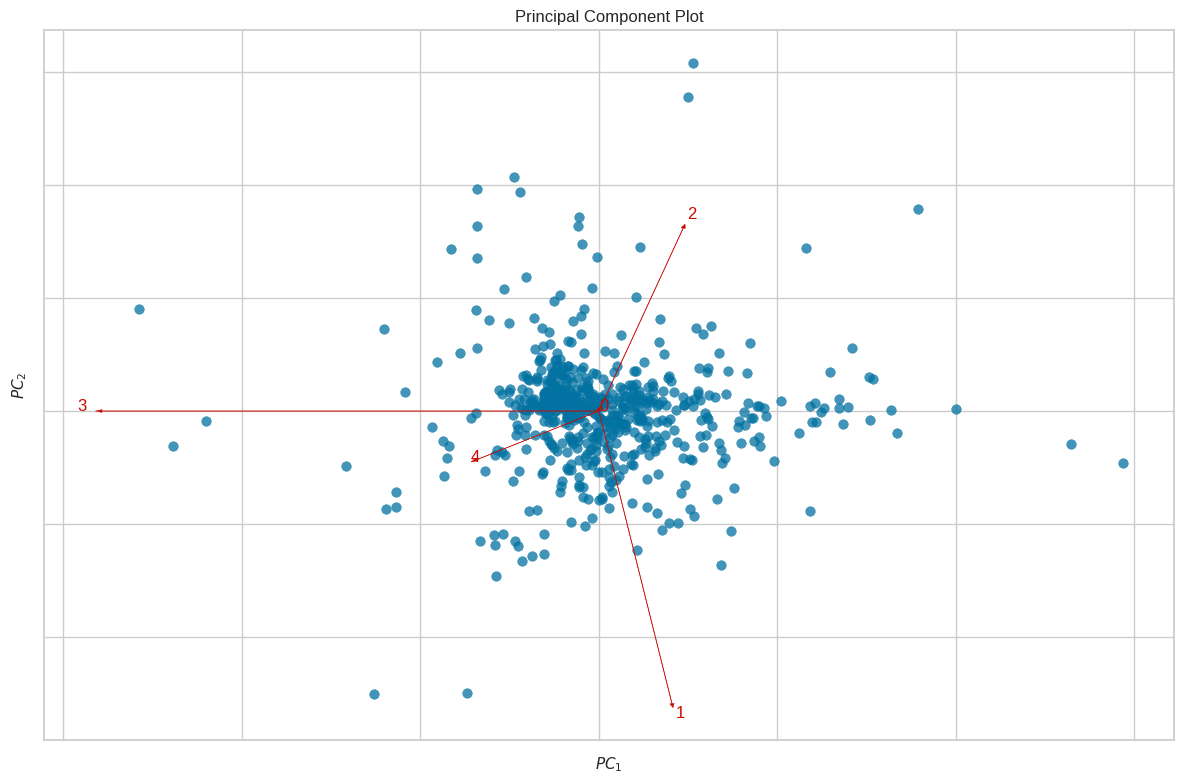

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [47]:
# pip install yellowbrick
from yellowbrick.features import PCA
plt.figure(figsize=(12 ,8))
# Load the dataset
X = pca_transformed

visualizer = PCA(scale=True, projection=2, proj_features=True)
visualizer.fit_transform(X)
visualizer.show()